# Decision program using machine learning methods

Classification - 2 classes (Accuracy):
*  Decision tree: **95.86%**
*  Random forest: **95.86%**
*  SVM: 87.59% (poly or rbf kernel)
*  kNN: 93.10%
*  MLP: 89.31% 

Classification - 3 classes (Accuracy):
*  Decision tree: 86.90% (cut-off 0.05), **93.79%** (cut-off 0.01)
*  Random forest: 87.59& (cut-off 0.05), **93.79%** (cut-off 0.01)
*  SVM: 76.55% (cut-off 0.05, linear kernel), 86.21% (cut-off 0.01, linear kernel)
*  kNN: 83.79% (cut-off 0.05), 91.38 (cut-off 0.01)
*  MLP: 77.59% (cut-off 0.05), 86.90% (cut-off 0.01)

Regression (MSE):
*  Decision tree: **0.0954**
*  Random forest: **0.0923**
*  SVM: 0.8457 (rbf kernel)
*  kNN: 0.2115
*  Multi Layer Perceptron MLP:
   *  3 layers: 0.6260 (hidden layer size: 40, batch size: 10, learning rate: 0.1, epochs: 100)  
   *  4 layers: 0.4360 (hidden layer sizes: 40, 15, batch size: 10, learning rate: 0.1, epochs: 100)  
   *  5 layers: 0.4633 (hidden layer sizes: 70, 40, 20, batch size: 10, learning rate: 0.1, epochs: 100)
   *  6 layers: 0.3609 (hidden layer sizes: 80, 70, 40, 20, batch size: 10, learning rate: 0.1, epochs: 100)

Train set as train and as validation set:  
*  Accuracy for two classes: **97.98%** (decision tree or random forest)
*  Accuracy for three classes: 94.06% (decision tree or random forest, cut-off 0.05), **97.20%** (decision tree or random forest, cut-off 0.01)
*  MSE for time difference: **0.0335** (decision tree), 0.0427 (random forest)

In [1]:
!pip install scikit-learn
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install torch
!pip install tqdm

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader

### Import the data

In [3]:
file_path = 'results/features_times_augment.csv'
df = pd.read_csv(file_path)
df.head()

,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,diff rewr+rewr-orig,#relations,...,min(branching factors),max(branching factors),mean(branching factors),median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text
0,STATS,001-014,orig,orig,0.025373,0.051895,1.977303,0.026522,1.951929,3,...,2,2,2.0,2.0,1.0,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.Id) FROM comments as c, votes as ..."
1,STATS,001-014-augA1,orig,orig,0.027259,0.041034,1.837866,0.013775,1.810608,3,...,1,1,1.0,1.0,NaN,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(c.id) FROM comments as c, votes as ..."
2,STATS,001-014-augA2,orig,orig,0.027502,0.056328,1.874659,0.028826,1.847156,3,...,1,1,1.0,1.0,NaN,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(v.id) FROM comments as c, votes as ..."
3,STATS,001-014-augF1,orig,orig,0.024752,0.048523,1.880818,0.023772,1.856066,3,...,2,2,2.0,2.0,1.0,"[99733, 728, 31480]","[18090, 61]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.Id) FROM comments as c, votes as ..."
4,STATS,001-014-augF1-augA1,orig,orig,0.024448,0.039470,1.894473,0.015023,1.870025,3,...,1,1,1.0,1.0,NaN,"[99733, 728, 31480]","[18090, 61]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(c.id) FROM comments as c, votes as ..."


In [4]:
df.dtypes

bench                         object
query                         object
orig/rewr(mean)               object
orig/rewr+rewr(mean)          object
orig mean                    float64
rewr mean                    float64
rewr mean+rewr               float64
diff rewr-orig               float64
diff rewr+rewr-orig          float64
#relations                     int64
#conditions                    int64
#filters                       int64
#joins                         int64
total cost                   float64
min(table rows)                int64
max(table rows)                int64
mean(table rows)             float64
q25(table rows)              float64
median(table rows)           float64
q75(table rows)              float64
min(join rows)                 int64
max(join rows)                object
mean(join rows)              float64
q25(join rows)               float64
median(join rows)            float64
q75(join rows)               float64
depth                          int64
m

In [5]:
df['max(join rows)'] = df['max(join rows)'].astype("float64")

#### Delete those examples, where both methods gave a timeout

In [6]:
df[df["orig/rewr(mean)"] == "-"]

,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,diff rewr+rewr-orig,#relations,...,min(branching factors),max(branching factors),mean(branching factors),median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text
2077,SNAP,wiki-path06,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p1.toNode) from wiki p1, wiki p2, w..."
2078,SNAP,wiki-path06-augA1,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p2.fromnode) from wiki p1, wiki p2,..."
2079,SNAP,wiki-path06-augA2,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p3.fromnode) from wiki p1, wiki p2,..."
2080,SNAP,wiki-path06-augA3,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p4.fromnode) from wiki p1, wiki p2,..."
2081,SNAP,wiki-path06-augA4,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p5.fromnode) from wiki p1, wiki p2,..."
2082,SNAP,wiki-path06-augA5,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p6.fromnode) from wiki p1, wiki p2,..."
2083,SNAP,wiki-path06-augA6,-,-,100.0,100.0,100.0,0.0,0.0,7,...,1,2,1.200000,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[326762260512167952384, 62304772963830, 206402...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 2]","select MIN(p7.fromnode) from wiki p1, wiki p2,..."
2084,SNAP,wiki-path07,-,-,100.0,100.0,100.0,0.0,0.0,8,...,1,2,1.166667,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[56772159792588989136896, 62304772963830, 2064...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 1, 2]","select MIN(p1.toNode) from wiki p1, wiki p2, w..."
2085,SNAP,wiki-path07-augA1,-,-,100.0,100.0,100.0,0.0,0.0,8,...,1,2,1.166667,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[56772159792588989136896, 62304772963830, 2064...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 1, 2]","select MIN(p2.fromnode) from wiki p1, wiki p2,..."
2086,SNAP,wiki-path07-augA2,-,-,100.0,100.0,100.0,0.0,0.0,8,...,1,2,1.166667,1.0,1.000000,"[11879844, 28511626, 28511626, 28511626, 28511...","[56772159792588989136896, 62304772963830, 2064...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 1, 2]","select MIN(p3.fromnode) from wiki p1, wiki p2,..."


For the SNAP dataset the wiki-path06, wiki-path07, wiki-path08 and wiki-tree03 (for all augmentation cases) did not finish the evaluation within our timeout (100 sec). Therefore, we cannot conclude which variante is the better one and we delete those 32 samples.

In [7]:
df = df[df["orig/rewr(mean)"] != "-"]
df.shape

(2904, 43)

#### Get the feature matrix

Get the features matrix X and the response variables y1 and y1, where once the rewritting time and the evaluation time are taken into consideration and once only the evaluation time. Additionally the response variables have to have numbers in it and we assign 1 = rewr and 0 = orig.

In [8]:
X = df.iloc[:, 9:37]
X.head()

,#relations,#conditions,#filters,#joins,total cost,min(table rows),max(table rows),mean(table rows),q25(table rows),median(table rows),...,min(container counts),max(container counts),mean(container counts),q25(container counts),median(container counts),q75(container counts),min(branching factors),max(branching factors),mean(branching factors),median(branching factors)
0,3,7,5,2,9607.31,969,99733,44060.666667,16224.5,31480.0,...,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0
1,3,7,5,2,9607.31,969,99733,44060.666667,16224.5,31480.0,...,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0
2,3,7,5,2,9607.31,969,99733,44060.666667,16224.5,31480.0,...,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0
3,3,7,5,2,9590.51,728,99733,43980.333333,16104.0,31480.0,...,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0
4,3,7,5,2,9590.51,728,99733,43980.333333,16104.0,31480.0,...,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0


#### Log-transformations

Some of the features have a big range of possible values. Therefore, we log transform those.

In [9]:
min_values = X.min()
max_values = X.max()
diff = max_values-min_values

pd.DataFrame({'Min': min_values, 'Max': max_values, 'Diff': diff})

,Min,Max,Diff
#relations,2.000000,1.100000e+01,9.000000e+00
#conditions,2.000000,2.000000e+01,1.800000e+01
#filters,0.000000,1.600000e+01,1.600000e+01
#joins,1.000000,1.200000e+01,1.100000e+01
total cost,209.970000,8.739948e+16,8.739948e+16
min(table rows),1.000000,1.187984e+07,1.187984e+07
max(table rows),21.000000,2.851163e+07,2.851160e+07
mean(table rows),5.000000,2.573966e+07,2.573966e+07
q25(table rows),1.000000,2.851163e+07,2.851162e+07
median(table rows),1.000000,2.851163e+07,2.851162e+07


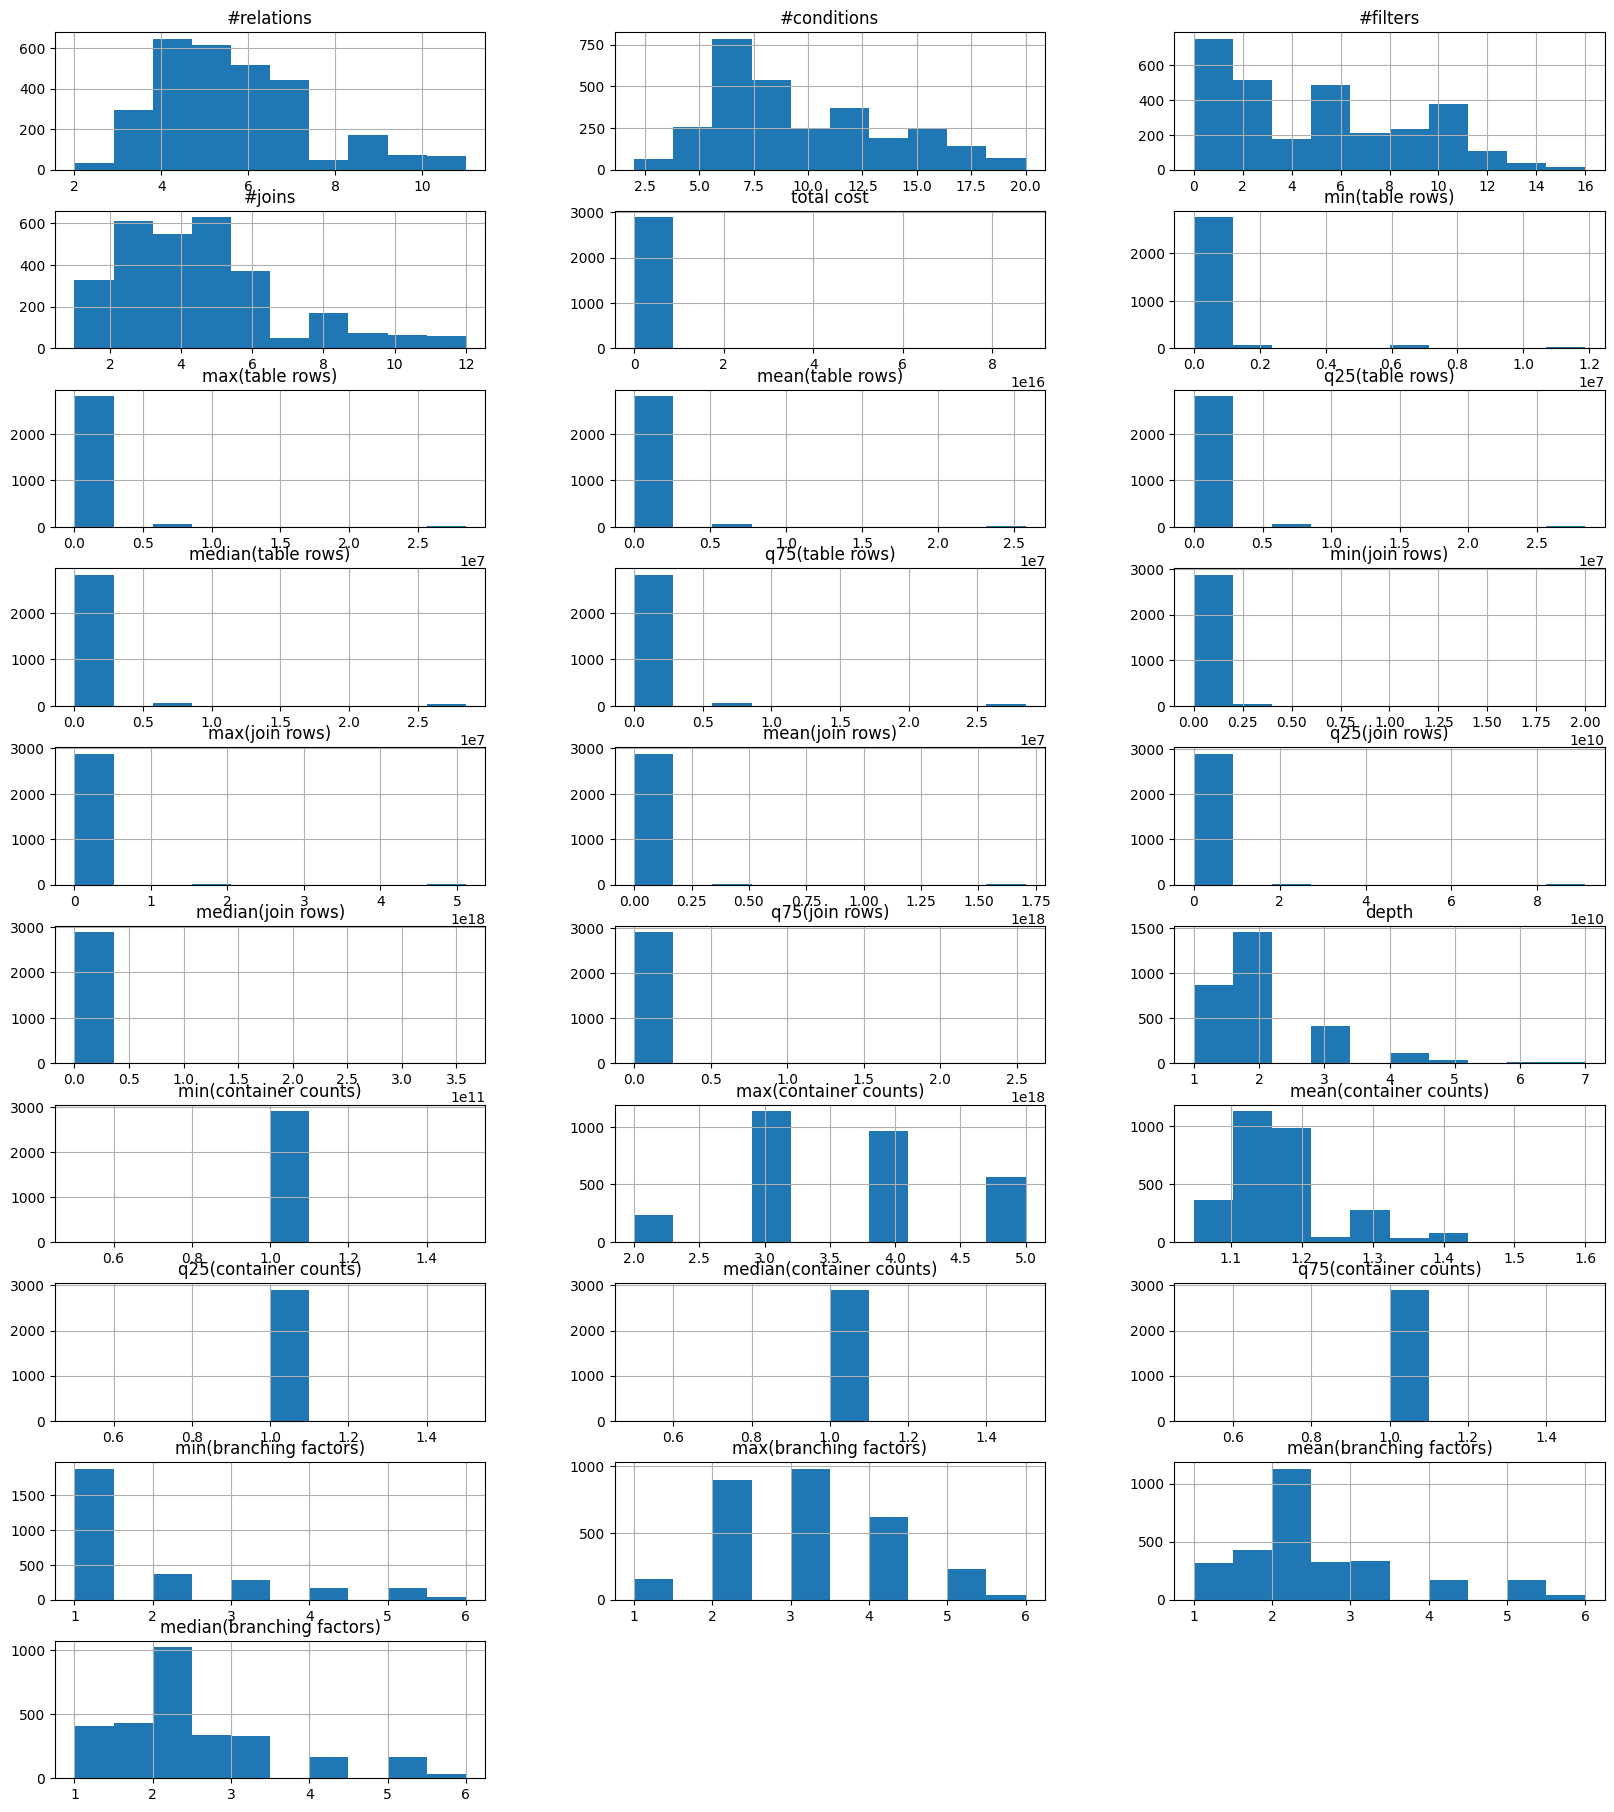

In [10]:
X.hist(layout=(11, 3), figsize=(20, 25))
plt.show()

We transform all table rows and join rows variables and the total cost.

In [11]:
columns_to_log = ['total cost', 'min(table rows)', 'max(table rows)',
       'mean(table rows)', 'q25(table rows)', 'median(table rows)',
       'q75(table rows)', 'min(join rows)', 'max(join rows)',
       'mean(join rows)', 'q25(join rows)', 'median(join rows)',
       'q75(join rows)']
X[columns_to_log] = X[columns_to_log].apply(np.log)

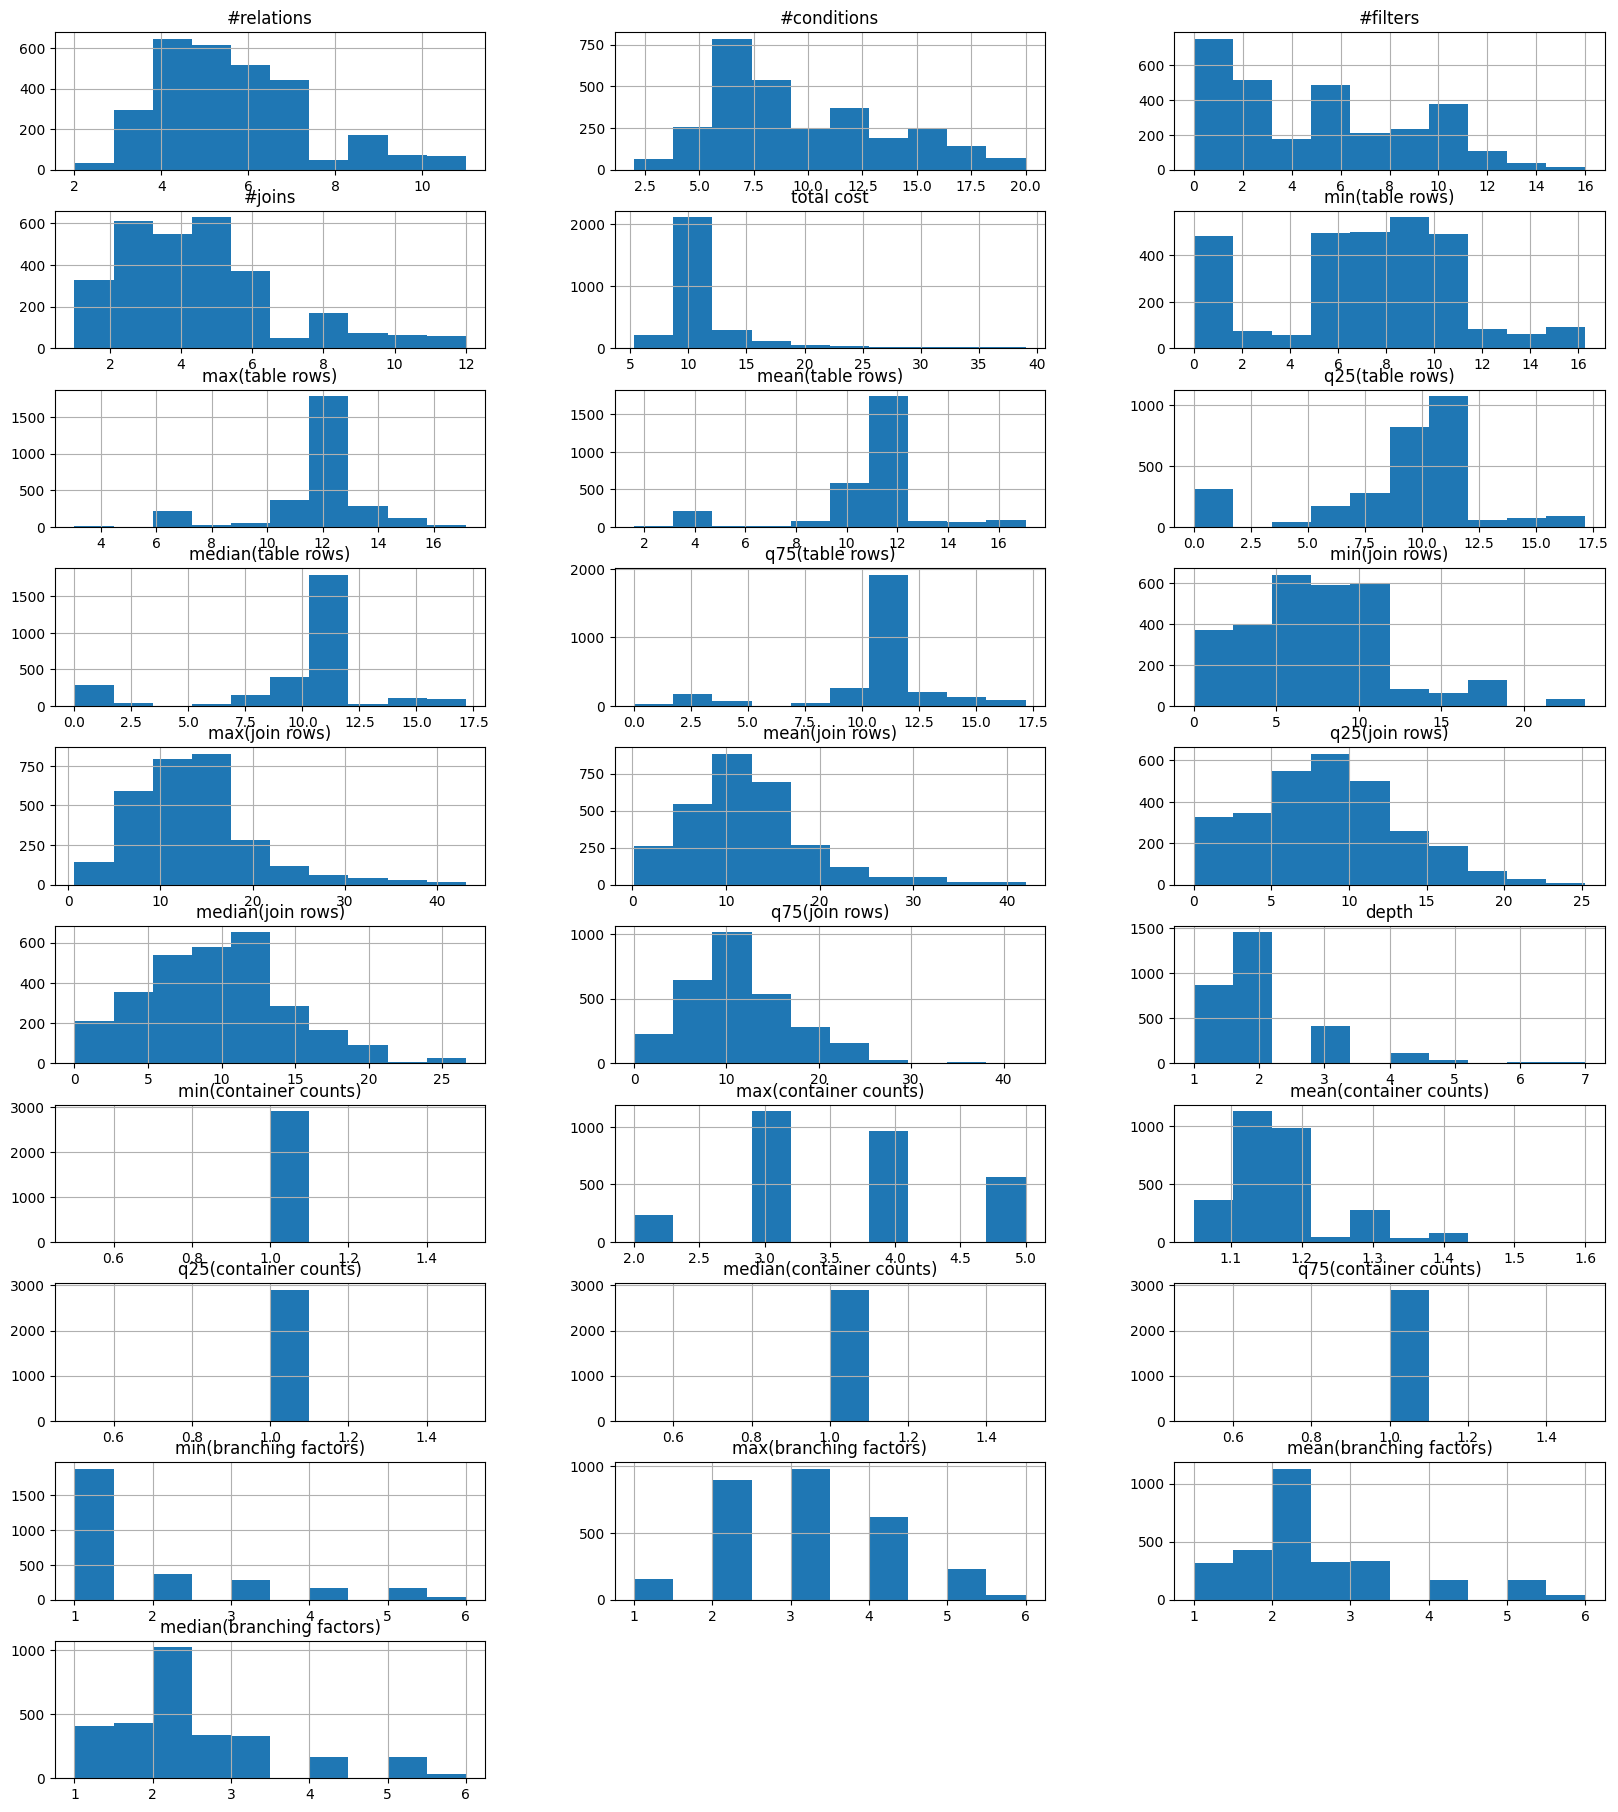

In [12]:
X.hist(layout=(11, 3), figsize=(20, 25))
plt.show()

#### Boxplots of running times for both cases (either original or rewritten)

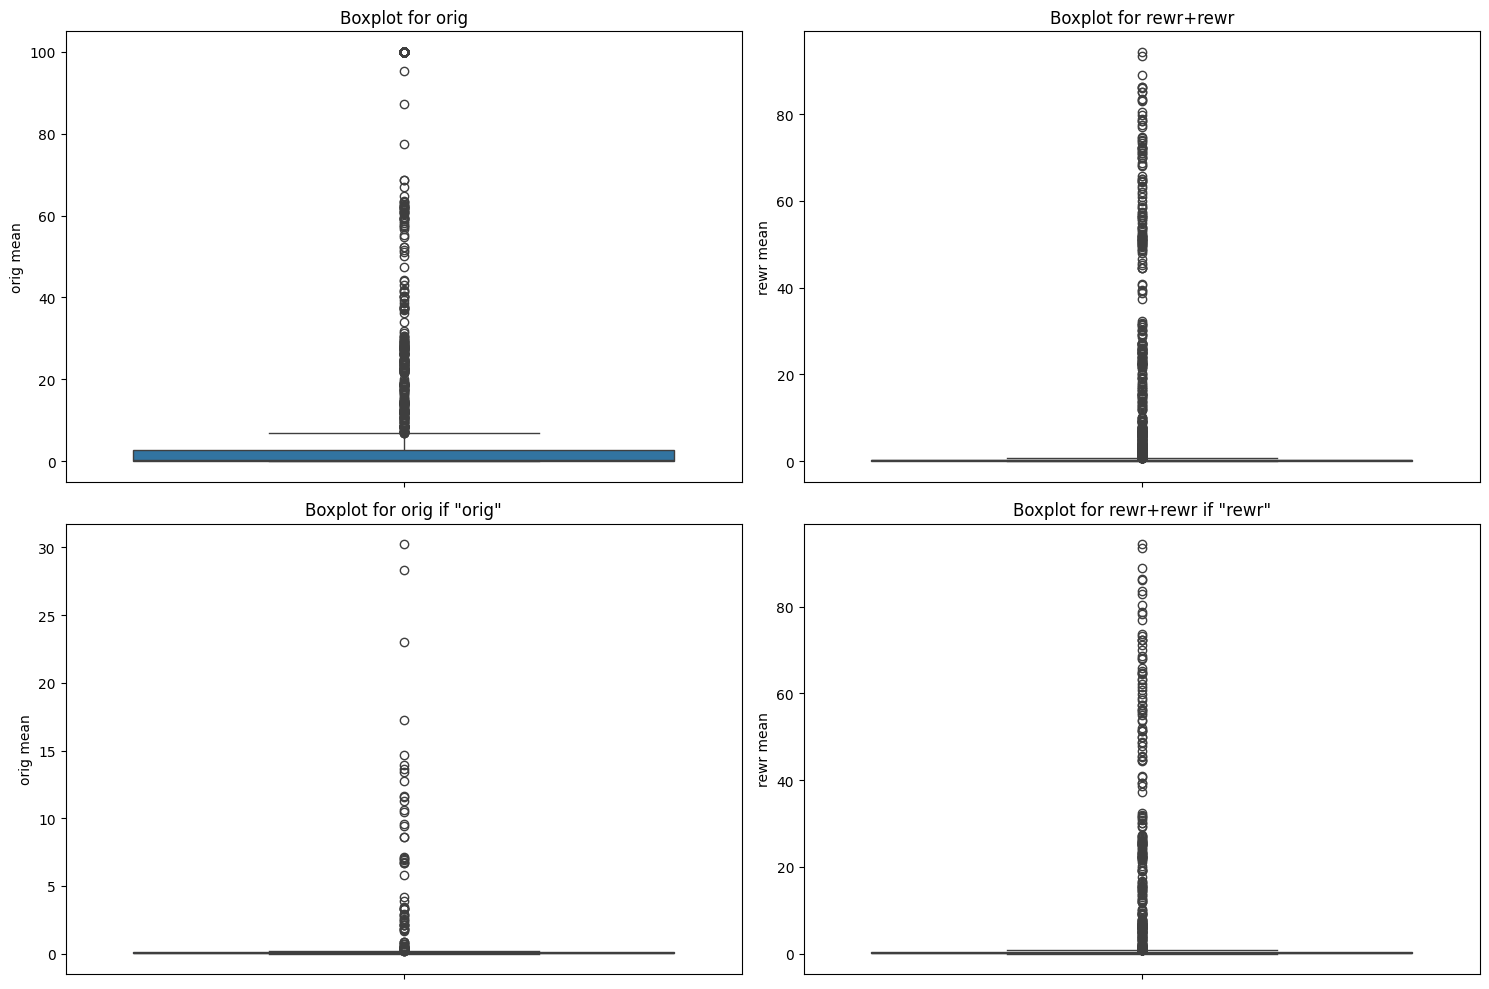

In [13]:
df_orig = df[df['orig/rewr(mean)'] == 'orig']
df_rewr = df[df['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y='orig mean', data=df, ax=axes[0,0])
axes[0,0].set_title(f'Boxplot for orig')

sns.boxplot(y='rewr mean', data=df, ax=axes[0,1])
axes[0,1].set_title(f'Boxplot for rewr+rewr')

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'Boxplot for orig if "orig"')

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'Boxplot for rewr+rewr if "rewr"')

plt.tight_layout()
plt.show()

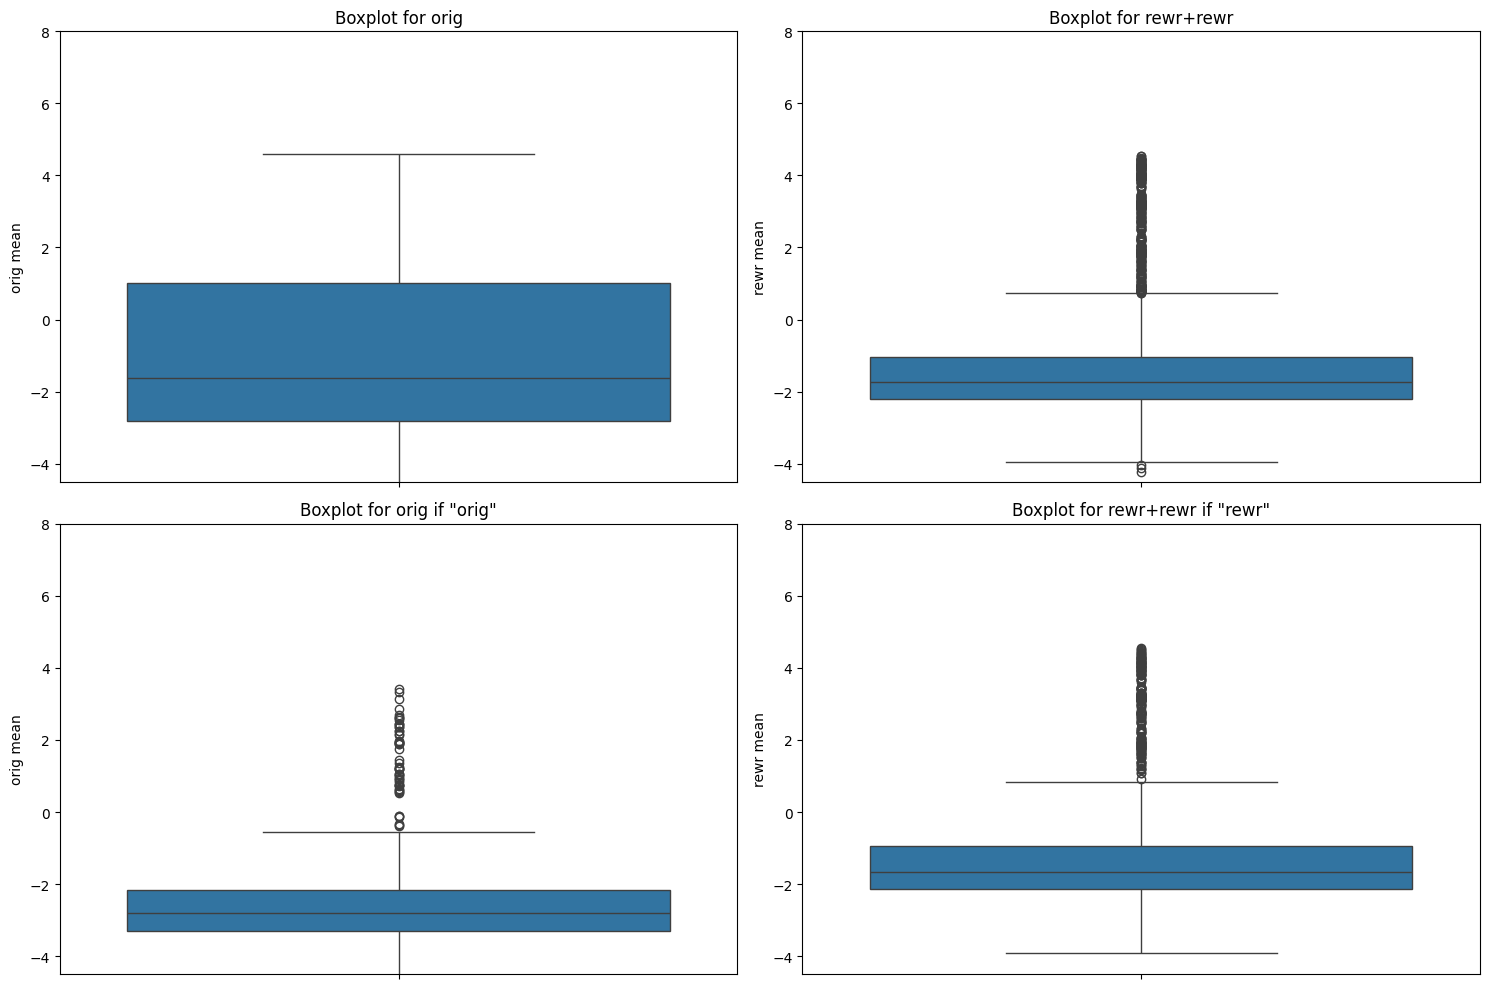

In [14]:
df_log = df.copy()
df_log["orig mean"] = np.log(df_log["orig mean"])
df_log["rewr mean"] = np.log(df_log["rewr mean"])

df_orig = df_log[df_log['orig/rewr(mean)'] == 'orig']
df_rewr = df_log[df_log['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y='orig mean', data=df_log, ax=axes[0,0])
axes[0,0].set_title(f'Boxplot for orig')
axes[0,0].set_ylim(-4.5, 8) 

sns.boxplot(y='rewr mean', data=df_log, ax=axes[0,1])
axes[0,1].set_title(f'Boxplot for rewr+rewr')
axes[0,1].set_ylim(-4.5, 8) 

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'Boxplot for orig if "orig"')
axes[1,0].set_ylim(-4.5, 8) 

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'Boxplot for rewr+rewr if "rewr"')
axes[1,1].set_ylim(-4.5, 8) 

plt.tight_layout()
plt.show()

#### Scatterplot of running times

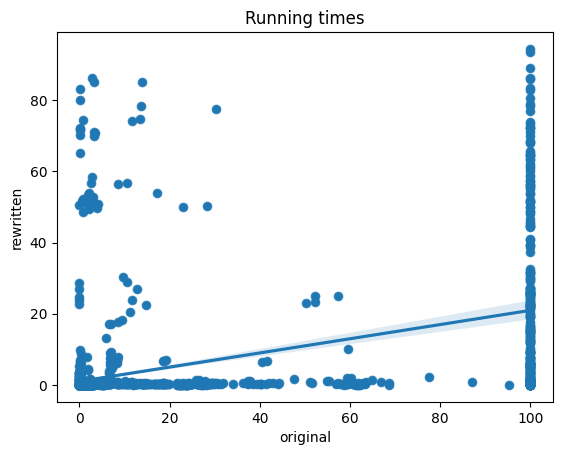

In [15]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df)
sns.regplot(x="orig mean", y="rewr mean", data=df) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

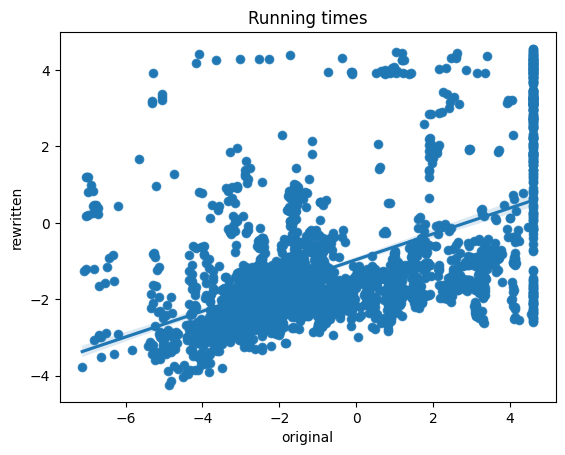

In [16]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df_log)
sns.regplot(x="orig mean", y="rewr mean", data=df_log) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

#### Classification response

Get the column(s) where we have "orig" or "rewr", depending on which method was faster. We now want to encode this as 0 (evaluating the original query faster) and 1 (evaluating the rewritten query faster).

In [17]:
mapping = {'orig': 0, 'rewr': 1}
y1 = df['orig/rewr(mean)'].map(mapping)
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr(mean), dtype: int64

The number of appearances of original and rewritten is very balanced.

In [18]:
y1.value_counts()

orig/rewr(mean)
0    1471
1    1433
Name: count, dtype: int64

#### Classification response with three cases

In [19]:
condition = abs(df["diff rewr-orig"]) < 0.1
df["orig/rewr/equal 0.1"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.1'] = 'equal'

In [20]:
condition = abs(df["diff rewr-orig"]) < 0.05
df["orig/rewr/equal 0.05"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.05'] = 'equal'

In [21]:
condition = abs(df["diff rewr-orig"]) < 0.01
df["orig/rewr/equal 0.01"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.01'] = 'equal'

In [22]:
df.head(20)

,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,diff rewr+rewr-orig,#relations,...,median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text,orig/rewr/equal 0.1,orig/rewr/equal 0.05,orig/rewr/equal 0.01
0,STATS,001-014,orig,orig,0.025373,0.051895,1.977303,0.026522,1.951929,3,...,2.0,1.0,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.Id) FROM comments as c, votes as ...",equal,equal,orig
1,STATS,001-014-augA1,orig,orig,0.027259,0.041034,1.837866,0.013775,1.810608,3,...,1.0,NaN,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(c.id) FROM comments as c, votes as ...",equal,equal,orig
2,STATS,001-014-augA2,orig,orig,0.027502,0.056328,1.874659,0.028826,1.847156,3,...,1.0,NaN,"[99733, 969, 31480]","[24066, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(v.id) FROM comments as c, votes as ...",equal,equal,orig
3,STATS,001-014-augF1,orig,orig,0.024752,0.048523,1.880818,0.023772,1.856066,3,...,2.0,1.0,"[99733, 728, 31480]","[18090, 61]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.Id) FROM comments as c, votes as ...",equal,equal,orig
4,STATS,001-014-augF1-augA1,orig,orig,0.024448,0.039470,1.894473,0.015023,1.870025,3,...,1.0,NaN,"[99733, 728, 31480]","[18090, 61]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(c.id) FROM comments as c, votes as ...",equal,equal,orig
5,STATS,001-014-augF1-augA2,orig,orig,0.028031,0.056849,1.840956,0.028819,1.812925,3,...,1.0,NaN,"[99733, 728, 31480]","[18090, 61]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(v.id) FROM comments as c, votes as ...",equal,equal,orig
6,STATS,001-014-augF2,orig,orig,0.026280,0.055280,1.814864,0.029000,1.788584,3,...,2.0,1.0,"[99733, 969, 31525]","[24101, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.Id) FROM comments as c, votes as ...",equal,equal,orig
7,STATS,001-014-augF2-augA1,orig,orig,0.030530,0.041531,1.894635,0.011001,1.864105,3,...,1.0,NaN,"[99733, 969, 31525]","[24101, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(c.id) FROM comments as c, votes as ...",equal,equal,orig
8,STATS,001-014-augF2-augA2,orig,orig,0.028392,0.054311,1.849453,0.025918,1.821061,3,...,2.0,1.0,"[99733, 969, 31525]","[24101, 81]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(v.id) FROM comments as c, votes as ...",equal,equal,orig
9,STATS,002-048,orig,orig,0.066407,0.119431,1.928187,0.053025,1.861780,5,...,2.0,1.0,"[101755, 192979, 268, 31527, 79851]","[81277596, 98639, 10171, 194]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 1]","SELECT MIN(c.Id) FROM comments as c, postHisto...",equal,orig,orig


In [23]:
df["orig/rewr/equal 0.1"].value_counts()

orig/rewr/equal 0.1
rewr     1191
equal    1064
orig      649
Name: count, dtype: int64

In [24]:
df["orig/rewr/equal 0.05"].value_counts()

orig/rewr/equal 0.05
rewr     1279
orig     1034
equal     591
Name: count, dtype: int64

In [25]:
df["orig/rewr/equal 0.01"].value_counts()

orig/rewr/equal 0.01
orig     1418
rewr     1385
equal     101
Name: count, dtype: int64

In [26]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_01 = df['orig/rewr/equal 0.1'].map(mapping1)
y1_equal_01.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.1, dtype: int64

In [27]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_005 = df['orig/rewr/equal 0.05'].map(mapping1)
y1_equal_005.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.05, dtype: int64

In [28]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_001 = df['orig/rewr/equal 0.01'].map(mapping1)
y1_equal_001.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: orig/rewr/equal 0.01, dtype: int64

#### Regression response

We also have the time differences between the original and rewritten method and we want to use that as numerical response.

In [29]:
y1_diff = df["diff rewr-orig"]
#y1_diff = df["diff rewr+rewr-orig"]

We can see that the time difference has a wide range of values (or is skewed).

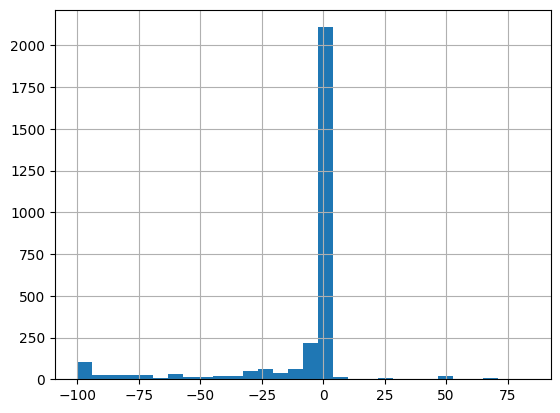

In [30]:
y1_diff.hist(bins = 30)
plt.show()

Therefore, we are going to transform it. As before with the features, we would like to apply a log transformation. Neverthless, since we have negative values this cannot be applied directly. We are going to multiple to log of the absolute values with the sign they had before. Additionally, since we have a lot of values close to zero, which leads to very low log values, we add 1 to the absolute values, which is a common method.   
$x = sgn(x) * log(|x| + 1)$

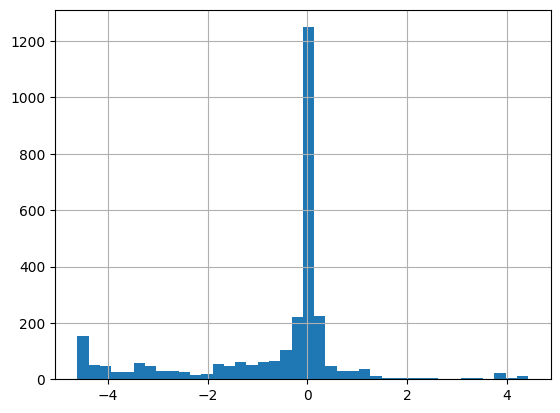

In [31]:
y1_diff_log = np.sign(y1_diff) * np.log(abs(y1_diff) +1)
y1_diff_log.hist(bins = 40)
plt.show()

#### Train-validation-test split

We split the dataset such that each benchmark dataset is represented in the train and in the test set (stratification). We do a 80% train, 10% validation and 10% test split.

In [32]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=df["bench"], random_state=20)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, stratify=df.loc[X_test.index]["bench"], random_state=20)
y1_diff_log_train = y1_diff_log.loc[y1_train.index]
y1_diff_log_val = y1_diff_log.loc[y1_val.index]
y1_diff_log_test = y1_diff_log.loc[y1_test.index]
y1_equal_005_train = y1_equal_005.loc[y1_train.index]
y1_equal_005_val = y1_equal_005.loc[y1_val.index]
y1_equal_005_test = y1_equal_005.loc[y1_test.index]
y1_equal_01_train = y1_equal_01.loc[y1_train.index]
y1_equal_01_val = y1_equal_01.loc[y1_val.index]
y1_equal_01_test = y1_equal_01.loc[y1_test.index]
y1_equal_001_train = y1_equal_001.loc[y1_train.index]
y1_equal_001_val = y1_equal_001.loc[y1_val.index]
y1_equal_001_test = y1_equal_001.loc[y1_test.index]

## ML models

### Decision tree with two classes

In [33]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [34]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
accuracy

0.9586206896551724

In [35]:
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[141,   2],
       [ 10, 137]])

### Decision tree with three classes

##### equal cut off: 0.05

In [36]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [37]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
accuracy

0.8689655172413793

In [38]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

array([[ 92,   7,   0],
       [ 20,  44,   5],
       [  1,   5, 116]])

##### equal cut off: 0.1

In [39]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_val)

In [40]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_dec_tree)
accuracy

0.8620689655172413

In [41]:
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_dec_tree)
conf_matrix

array([[ 48,  13,   1],
       [ 16,  96,   3],
       [  1,   6, 106]])

##### equal cut off: 0.01

In [42]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [43]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
accuracy

0.9379310344827586

In [44]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

array([[137,   2,   0],
       [  3,   6,   3],
       [  9,   1, 129]])

### Decision tree with time difference

In [45]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [46]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mse

0.09542908835810975

### Random Forest with two classes

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=20)
model.fit(X_train, y1_train)
y1_pred_rand_forest = model.predict(X_val)

In [48]:
accuracy = accuracy_score(y1_val, y1_pred_rand_forest)
accuracy

0.9586206896551724

In [49]:
conf_matrix = confusion_matrix(y1_val, y1_pred_rand_forest)
conf_matrix

array([[139,   4],
       [  8, 139]])

### Random Forest with three classes

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=20)
model.fit(X_train, y1_equal_005_train)
y1_pred_rand_forest = model.predict(X_val)

In [51]:
accuracy = accuracy_score(y1_equal_005_val, y1_pred_rand_forest)
accuracy

0.8758620689655172

In [52]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_pred_rand_forest)
conf_matrix

array([[ 92,   7,   0],
       [ 17,  45,   7],
       [  1,   4, 117]])

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=20)
model.fit(X_train, y1_equal_001_train)
y1_pred_rand_forest = model.predict(X_val)

In [54]:
accuracy = accuracy_score(y1_equal_001_val, y1_pred_rand_forest)
accuracy

0.9379310344827586

In [55]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_pred_rand_forest)
conf_matrix

array([[135,   2,   2],
       [  3,   4,   5],
       [  4,   2, 133]])

### Random Forest with time difference

In [56]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_val)

In [57]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_rand_forest)
mse

0.0922705608696799

### SVM (Support Vector Machine) with two classes

In [58]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [59]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
accuracy

0.8655172413793103

In [60]:
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[132,  11],
       [ 28, 119]])

In [61]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_train)
y1_pred_svm_poly = clf.predict(X_val)

In [62]:
accuracy = accuracy_score(y1_val, y1_pred_svm_poly)
accuracy

0.8758620689655172

In [63]:
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_poly)
conf_matrix

array([[134,   9],
       [ 27, 120]])

In [64]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_train)
y1_pred_svm_rbf = clf.predict(X_val)

In [65]:
accuracy = accuracy_score(y1_val, y1_pred_svm_rbf)
accuracy

0.8758620689655172

In [66]:
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_rbf)
conf_matrix

array([[134,   9],
       [ 27, 120]])

### SVM (Support Vector Machine) with three classes

In [67]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_005_train)
y1_pred_svm_linear = clf.predict(X_val)

In [68]:
accuracy = accuracy_score(y1_equal_005_val, y1_pred_svm_linear)
accuracy

0.7655172413793103

In [69]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_pred_svm_linear)
conf_matrix

array([[ 83,  12,   4],
       [ 30,  31,   8],
       [  6,   8, 108]])

In [70]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_005_train)
y1_pred_svm_poly = clf.predict(X_val)

In [71]:
accuracy = accuracy_score(y1_equal_005_val, y1_pred_svm_poly)
accuracy

0.7241379310344828

In [72]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_pred_svm_poly)
conf_matrix

array([[ 88,   5,   6],
       [ 45,  14,  10],
       [  7,   7, 108]])

In [73]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_005_train)
y1_pred_svm_rbf = clf.predict(X_val)

In [74]:
accuracy = accuracy_score(y1_equal_005_val, y1_pred_svm_rbf)
accuracy

0.7448275862068966

In [75]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_pred_svm_rbf)
conf_matrix

array([[ 83,   8,   8],
       [ 31,  25,  13],
       [  7,   7, 108]])

In [76]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_001_train)
y1_pred_svm_linear = clf.predict(X_val)

In [77]:
accuracy = accuracy_score(y1_equal_001_val, y1_pred_svm_linear)
accuracy

0.8620689655172413

In [78]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_pred_svm_linear)
conf_matrix

array([[131,   0,   8],
       [ 10,   0,   2],
       [ 20,   0, 119]])

In [79]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_001_train)
y1_pred_svm_poly = clf.predict(X_val)

In [80]:
accuracy = accuracy_score(y1_equal_001_val, y1_pred_svm_poly)
accuracy

0.8551724137931035

In [81]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_pred_svm_poly)
conf_matrix

array([[131,   0,   8],
       [  8,   0,   4],
       [ 22,   0, 117]])

In [82]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_001_train)
y1_pred_svm_rbf = clf.predict(X_val)

In [83]:
accuracy = accuracy_score(y1_equal_001_val, y1_pred_svm_rbf)
accuracy

0.8586206896551725

In [84]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_pred_svm_rbf)
conf_matrix

array([[131,   0,   8],
       [  9,   0,   3],
       [ 21,   0, 118]])

### SVM (Support Vector Machine) with time difference

In [85]:
clf = SVR(kernel='linear')
clf.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = clf.predict(X_val)

In [86]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mse

1.1686123603167764

In [87]:
clf = SVR(kernel='poly')
clf.fit(X_train, y1_diff_log_train)
y1_pred_svm_poly = clf.predict(X_val)

In [88]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_poly)
mse

0.923221589642174

In [89]:
clf = SVR(kernel='rbf')
clf.fit(X_train, y1_diff_log_train)
y1_pred_svm_rbf = clf.predict(X_val)

In [90]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_rbf)
mse

0.8456560670107601

### kNN with two classes

In [91]:
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train, y1_train)
y1_pred_kNN_5 = clf.predict(X_val)

In [92]:
accuracy = accuracy_score(y1_val, y1_pred_kNN_5)
accuracy

0.9310344827586207

In [93]:
conf_matrix = confusion_matrix(y1_val, y1_pred_kNN_5)
conf_matrix

array([[139,   4],
       [ 16, 131]])

### kNN with three classes

In [94]:
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train, y1_equal_001_train)
y1_pred_kNN_5 = clf.predict(X_val)

In [95]:
accuracy = accuracy_score(y1_equal_001_val, y1_pred_kNN_5)
accuracy

0.9137931034482759

In [96]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_pred_kNN_5)
conf_matrix

array([[137,   0,   2],
       [  5,   2,   5],
       [ 13,   0, 126]])

In [97]:
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train, y1_equal_005_train)
y1_pred_kNN_5 = clf.predict(X_val)

In [98]:
accuracy = accuracy_score(y1_equal_005_val, y1_pred_kNN_5)
accuracy

0.8379310344827586

In [99]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_pred_kNN_5)
conf_matrix

array([[ 91,   7,   1],
       [ 26,  37,   6],
       [  3,   4, 115]])

### kNN with time difference

In [100]:
clf = KNeighborsRegressor(n_neighbors=5) 
clf.fit(X_train, y1_diff_log_train)
y1_pred_kNN_5 = clf.predict(X_val)

In [101]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_kNN_5)
mse

0.2115497300638825

### Deep MLP with two classes

In [102]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [103]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [104]:
custom_dataset = CustomDataset(X_train, y1_train)  # Assuming X_train and y_train are your training data
trainloader = DataLoader(custom_dataset, batch_size=10, shuffle=True)

In [105]:
mlp = MLPClassifier(random_seed=20)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()  # For multi-class classification, use CrossEntropyLoss
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [106]:
for epoch in range(200):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data

        optimizer.zero_grad()

        outputs = mlp(inputs)

        targets = targets.long()  # Convert target tensor to torch.long data type
        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
0.4843761934998721
Starting Epoch 2
0.41255658724277317
Starting Epoch 3
0.3858956971521541
Starting Epoch 4
0.37227265293761896
Starting Epoch 5
0.36646581290873337
Starting Epoch 6
0.35959471250552477
Starting Epoch 7
0.3538977942177666
Starting Epoch 8
0.35062948850986786
Starting Epoch 9
0.3479672334928369
Starting Epoch 10
0.34462992217023997
Starting Epoch 11
0.34189766424792006
Starting Epoch 12
0.3372105362589267
Starting Epoch 13
0.3360289335570622
Starting Epoch 14
0.3362462511006343
Starting Epoch 15
0.3298764157033018
Starting Epoch 16
0.3294259553431441
Starting Epoch 17
0.32610265184753445
Starting Epoch 18
0.3256901748190622
Starting Epoch 19
0.3238402981103234
Starting Epoch 20
0.32010529228673984
Starting Epoch 21
0.3169610010292141
Starting Epoch 22
0.319863192673149
Starting Epoch 23
0.3132020769073216
Starting Epoch 24
0.3117156367061476
Starting Epoch 25
0.3088441202377045
Starting Epoch 26
0.3066143874286838
Starting Epoch 27
0.30562266494775026
S

In [107]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = torch.argmax(outputs, dim=1).numpy()

In [108]:
accuracy = accuracy_score(val_targets, predicted_labels)
accuracy

0.8931034482758621

In [109]:
conf_matrix = confusion_matrix(val_targets, predicted_labels)
conf_matrix

array([[128,  15],
       [ 16, 131]])

### Deep MLP with three classes

In [110]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [111]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [112]:
y1_equal_005_train_transformed = y1_equal_005_train + 1  # Transform -1 to 0, 0 to 1, and 1 to 2
y1_equal_005_val_transformed = y1_equal_005_val + 1

In [113]:
custom_dataset = CustomDataset(X_train, y1_equal_005_train_transformed)  # Assuming X_train and y_train are your training data
trainloader = DataLoader(custom_dataset, batch_size=10, shuffle=True)

In [114]:
mlp = MLPClassifier(random_seed=20)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()  # For multi-class classification, use CrossEntropyLoss
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [115]:
for epoch in range(200):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data

        optimizer.zero_grad()

        outputs = mlp(inputs)

        targets = targets.long()  # Convert target tensor to torch.long data type
        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
0.8076404650323893
Starting Epoch 2
0.704374999319535
Starting Epoch 3
0.6699763031220743
Starting Epoch 4
0.654693662352828
Starting Epoch 5
0.6402047048822493
Starting Epoch 6
0.6281789089732928
Starting Epoch 7
0.6200923303166173
Starting Epoch 8
0.6113406702428417
Starting Epoch 9
0.6047989641008459
Starting Epoch 10
0.5991514270141912
Starting Epoch 11
0.5932254407538876
Starting Epoch 12
0.5918332295484298
Starting Epoch 13
0.5852512059805219
Starting Epoch 14
0.5804520897855063
Starting Epoch 15
0.5789523741206386
Starting Epoch 16
0.5742857318707291
Starting Epoch 17
0.573260517591059
Starting Epoch 18
0.5712773702047413
Starting Epoch 19
0.5689236535790653
Starting Epoch 20
0.5624225240664421
Starting Epoch 21
0.5613120714354413
Starting Epoch 22
0.5574786973709457
Starting Epoch 23
0.5570538049731644
Starting Epoch 24
0.5560097720937668
Starting Epoch 25
0.55202496486672
Starting Epoch 26
0.5524260533789709
Starting Epoch 27
0.5476705401560268
Starting Epoch 

In [116]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_equal_005_val_transformed.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = torch.argmax(outputs, dim=1).numpy()

In [117]:
accuracy = accuracy_score(val_targets, predicted_labels)
accuracy

0.7758620689655172

In [118]:
conf_matrix = confusion_matrix(val_targets, predicted_labels)
conf_matrix

array([[ 85,   9,   5],
       [ 26,  29,  14],
       [  5,   6, 111]])

In [119]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [120]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [121]:
y1_equal_001_train_transformed = y1_equal_001_train + 1  # Transform -1 to 0, 0 to 1, and 1 to 2
y1_equal_001_val_transformed = y1_equal_001_val + 1

In [122]:
custom_dataset = CustomDataset(X_train, y1_equal_001_train_transformed)  # Assuming X_train and y_train are your training data
trainloader = DataLoader(custom_dataset, batch_size=10, shuffle=True)

In [123]:
mlp = MLPClassifier(random_seed=20)

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()  # For multi-class classification, use CrossEntropyLoss
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [124]:
for epoch in range(200):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data

        optimizer.zero_grad()

        outputs = mlp(inputs)

        targets = targets.long()  # Convert target tensor to torch.long data type
        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
0.5919072744416577
Starting Epoch 2
0.5030612426574138
Starting Epoch 3
0.4828155473546153
Starting Epoch 4
0.47407679867335145
Starting Epoch 5
0.46474107449210766
Starting Epoch 6
0.4591514260024472
Starting Epoch 7
0.4529215404084312
Starting Epoch 8
0.4494303896255759
Starting Epoch 9
0.4455021638343263
Starting Epoch 10
0.4405332442708793
Starting Epoch 11
0.4348602670009044
Starting Epoch 12
0.4331619479561568
Starting Epoch 13
0.43132430561238605
Starting Epoch 14
0.42339352182564305
Starting Epoch 15
0.4218113006696169
Starting Epoch 16
0.4187220997564782
Starting Epoch 17
0.4144315056726656
Starting Epoch 18
0.41463100548849596
Starting Epoch 19
0.4162208039329543
Starting Epoch 20
0.4088724318556008
Starting Epoch 21
0.40790096487322336
Starting Epoch 22
0.4040835447721343
Starting Epoch 23
0.40515831036117456
Starting Epoch 24
0.4037700358122715
Starting Epoch 25
0.400545862339469
Starting Epoch 26
0.4015263721282902
Starting Epoch 27
0.3969619339052188
Star

In [125]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_equal_001_val_transformed.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = torch.argmax(outputs, dim=1).numpy()

In [126]:
accuracy = accuracy_score(val_targets, predicted_labels)
accuracy

0.8689655172413793

In [127]:
conf_matrix = confusion_matrix(val_targets, predicted_labels)
conf_matrix

array([[130,   0,   9],
       [  8,   0,   4],
       [ 17,   0, 122]])

### Deep MLP with time difference

#### Torch MLP 1

In [128]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

##### Version 1
*  Layers: 4 (including input and output layer), sizes: 28 - 20 - 10 - 1
*  Loss: MSE
*  Batch size: 100
*  Epochs: 100
*  Learning rate: 0.01

In [129]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

In [130]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [131]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [132]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
2.2159281422694526
Starting Epoch 2
1.7987068891525269
Starting Epoch 3
1.6631239503622055
Starting Epoch 4
1.5741059829791386
Starting Epoch 5
1.5038150946299236
Starting Epoch 6
1.445039798816045
Starting Epoch 7
1.3930583695570629
Starting Epoch 8
1.3454438671469688
Starting Epoch 9
1.299639254808426
Starting Epoch 10
1.2526301518082619
Starting Epoch 11
1.208743376036485
Starting Epoch 12
1.172358291844527
Starting Epoch 13
1.14157235622406
Starting Epoch 14
1.114023933808009
Starting Epoch 15
1.0906074866652489
Starting Epoch 16
1.0650294919808705
Starting Epoch 17
1.0432265152533848
Starting Epoch 18
1.0241869886716206
Starting Epoch 19
1.0065928548574448
Starting Epoch 20
0.9899480442206064
Starting Epoch 21
0.9763245830933253
Starting Epoch 22
0.9636541828513145
Starting Epoch 23
0.9513847231864929
Starting Epoch 24
0.9394882073005041
Starting Epoch 25
0.9298030311862627
Starting Epoch 26
0.9199831187725067
Starting Epoch 27
0.9116342589259148
Starting Epoch 28

In [133]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [134]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.6970079786639092

##### Version 2
*  Layers: 4 (including input and output layer), sizes: 28 - **40** - 15 - 1
*  Loss: MSE
*  Batch size: 100
*  Epochs: 100
*  Learning rate: 0.01

In [135]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

In [136]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [137]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [138]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
1.8483388026555378
Starting Epoch 2
1.3592400252819061
Starting Epoch 3
1.2514428819219272
Starting Epoch 4
1.1858138913909595
Starting Epoch 5
1.143404612938563
Starting Epoch 6
1.1072313065330188
Starting Epoch 7
1.0822519610325496
Starting Epoch 8
1.0589745044708252
Starting Epoch 9
1.0384330426653225
Starting Epoch 10
1.020341398815314
Starting Epoch 11
1.0063203324874241
Starting Epoch 12
0.9932288949688276
Starting Epoch 13
0.9805271004637083
Starting Epoch 14
0.9707003235816956
Starting Epoch 15
0.9603216821948687
Starting Epoch 16
0.951389434436957
Starting Epoch 17
0.9434520130356153
Starting Epoch 18
0.9357175081968307
Starting Epoch 19
0.9285168622930845
Starting Epoch 20
0.9221683268745741
Starting Epoch 21
0.9160098458329836
Starting Epoch 22
0.9097670838236809
Starting Epoch 23
0.9051224490006765
Starting Epoch 24
0.8992681379119555
Starting Epoch 25
0.893051490187645
Starting Epoch 26
0.887763261795044
Starting Epoch 27
0.8828188677628835
Starting Epoch 

In [139]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [140]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.6384154867625833

##### Version 3
*  Layers: 4 (including input and output layer), sizes: 28 - 40 - 15 - 1   
   (28-50-15-1, 28-40-20-1, 28-40-10-1 all worse)
*  Loss: MSE
*  Batch size: 100
*  Epochs: 100
*  Learning rate: **0.1**

In [141]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

In [142]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [143]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [144]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
64.27785229186217
Starting Epoch 2
1.8306324084599812
Starting Epoch 3
1.8059482475121815
Starting Epoch 4
1.7862182408571243
Starting Epoch 5
1.7695355713367462
Starting Epoch 6
1.7563522855440776
Starting Epoch 7
1.7444225599368413
Starting Epoch 8
1.733495091398557
Starting Epoch 9
1.723211293419202
Starting Epoch 10
1.7132854859034221
Starting Epoch 11
1.7035860468943913
Starting Epoch 12
1.6940297832091649
Starting Epoch 13
1.684576377272606
Starting Epoch 14
1.6752349138259888
Starting Epoch 15
1.666096458832423
Starting Epoch 16
1.6571389734745026
Starting Epoch 17
1.6483543713887532
Starting Epoch 18
1.6397340993086498
Starting Epoch 19
1.6312219351530075
Starting Epoch 20
1.6228036135435104
Starting Epoch 21
1.6144839723904927
Starting Epoch 22
1.606229121486346
Starting Epoch 23
1.5980528046687443
Starting Epoch 24
1.5899248123168945
Starting Epoch 25
1.5817531098922093
Starting Epoch 26
1.5736920436223347
Starting Epoch 27
1.565684661269188
Starting Epoch 28

In [145]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [146]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

1.1850558784372263

##### Version 4
*  Layers: 4 (including input and output layer), sizes: 28 - 40 - 15 - 1
*  Loss: MSE
*  Batch size: 100
*  Epochs: **200**
*  Learning rate: 0.1

In [147]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

In [148]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [149]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [150]:
for epoch in range(0,200):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
64.27785229186217
Starting Epoch 2
1.8306324084599812
Starting Epoch 3
1.8059482475121815
Starting Epoch 4
1.7862182408571243
Starting Epoch 5
1.7695355713367462
Starting Epoch 6
1.7563522855440776
Starting Epoch 7
1.7444225599368413
Starting Epoch 8
1.733495091398557
Starting Epoch 9
1.723211293419202
Starting Epoch 10
1.7132854859034221
Starting Epoch 11
1.7035860468943913
Starting Epoch 12
1.6940297832091649
Starting Epoch 13
1.684576377272606
Starting Epoch 14
1.6752349138259888
Starting Epoch 15
1.666096458832423
Starting Epoch 16
1.6571389734745026
Starting Epoch 17
1.6483543713887532
Starting Epoch 18
1.6397340993086498
Starting Epoch 19
1.6312219351530075
Starting Epoch 20
1.6228036135435104
Starting Epoch 21
1.6144839723904927
Starting Epoch 22
1.606229121486346
Starting Epoch 23
1.5980528046687443
Starting Epoch 24
1.5899248123168945
Starting Epoch 25
1.5817531098922093
Starting Epoch 26
1.5736920436223347
Starting Epoch 27
1.565684661269188
Starting Epoch 28

In [151]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [152]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

1.0979785928898216

##### Version 5
*  Layers: 4 (including input and output layer), sizes: 28 - 40 - 15 - 1
*  Loss: MSE
*  Batch size: **10**
*  Epochs: 100
*  Learning rate: 0.1

In [153]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [154]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [155]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [156]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
3.1259902076787704
Starting Epoch 2
1.2071446188977348
Starting Epoch 3
1.118362996071705
Starting Epoch 4
1.0538980368157058
Starting Epoch 5
1.00714877992069
Starting Epoch 6
0.96193036393866
Starting Epoch 7
0.9225355860069714
Starting Epoch 8
0.8932655111930529
Starting Epoch 9
0.8613895919701572
Starting Epoch 10
0.8371003999458746
Starting Epoch 11
0.8198560805503646
Starting Epoch 12
0.8014374089311377
Starting Epoch 13
0.7812127321319007
Starting Epoch 14
0.7678224905573887
Starting Epoch 15
0.7527675995755093
Starting Epoch 16
0.7388777688081684
Starting Epoch 17
0.7277137359820083
Starting Epoch 18
0.716064001117781
Starting Epoch 19
0.7083906575621709
Starting Epoch 20
0.6989747949600091
Starting Epoch 21
0.688917686475257
Starting Epoch 22
0.6773087722389227
Starting Epoch 23
0.6679581982111599
Starting Epoch 24
0.6604910668369398
Starting Epoch 25
0.6497139581299263
Starting Epoch 26
0.6398746156305586
Starting Epoch 27
0.6322018589760484
Starting Epoch 28

In [157]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [158]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.4359717936255321

##### Version 6
*  Layers: 4 (including input and output layer), sizes: 28 - 40 - 15 - 1
*  Loss: **L1**
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [159]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [160]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [161]:
mlp = MLP(random_seed=20)

loss_function = nn.L1Loss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [162]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
0.9761623972347366
Starting Epoch 2
0.7372718209104988
Starting Epoch 3
0.7118466066700194
Starting Epoch 4
0.6889518347165103
Starting Epoch 5
0.6670798682347899
Starting Epoch 6
0.6533624415042063
Starting Epoch 7
0.635399628862291
Starting Epoch 8
0.620351386172577
Starting Epoch 9
0.6042332811033265
Starting Epoch 10
0.5862878765990805
Starting Epoch 11
0.5837395353314703
Starting Epoch 12
0.567533928117527
Starting Epoch 13
0.565705603476246
Starting Epoch 14
0.5574114668011154
Starting Epoch 15
0.5453065427204058
Starting Epoch 16
0.541046034528718
Starting Epoch 17
0.5423244181620717
Starting Epoch 18
0.5356752086638636
Starting Epoch 19
0.5317524527659232
Starting Epoch 20
0.5256554942114414
Starting Epoch 21
0.5213975561502922
Starting Epoch 22
0.5219136847287033
Starting Epoch 23
0.5235544799351385
Starting Epoch 24
0.517897093148958
Starting Epoch 25
0.5202456154408884
Starting Epoch 26
0.5130091040143383
Starting Epoch 27
0.5133668458001296
Starting Epoch 2

In [163]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [164]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.7583335593434779

##### Version 7
*  Layers: **3** (including input and output layer), sizes: 28 - 40 - 1   
   (28-30-1 similar, 28-50-1,28-35-1,28-20-1,28-15-1,28-10-1,28-5-1 all worse)
*  Loss: MSE
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [165]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [166]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [167]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [168]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()
        
    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
10.744876599874619
Starting Epoch 2
1.3565228374858782
Starting Epoch 3
1.2653112726150153
Starting Epoch 4
1.2068460708396118
Starting Epoch 5
1.1728473681748681
Starting Epoch 6
1.1484434741505225
Starting Epoch 7
1.1283409314094184
Starting Epoch 8
1.1099287594464715
Starting Epoch 9
1.0928487093407708
Starting Epoch 10
1.0772021215233167
Starting Epoch 11
1.0629289434191496
Starting Epoch 12
1.0496980790928199
Starting Epoch 13
1.041615158703194
Starting Epoch 14
1.0289041477978997
Starting Epoch 15
1.0231068330964816
Starting Epoch 16
1.0152885514459384
Starting Epoch 17
1.007806978831987
Starting Epoch 18
1.0012760001830276
Starting Epoch 19
0.9975862865987766
Starting Epoch 20
0.9935897241142686
Starting Epoch 21
0.9885712140619499
Starting Epoch 22
0.9832553130618492
Starting Epoch 23
0.9773730040875628
Starting Epoch 24
0.9707229799339188
Starting Epoch 25
0.9658134783989881
Starting Epoch 26
0.9598188101925563
Starting Epoch 27
0.9530683536194425
Starting Epo

In [169]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [170]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.62600938450516

##### Version 8
*  Layers: **5** (including input and output layer), sizes: 28 - 70 - 40 - 20 - 1   
   (28-50-20-10-1, 28-40-20-10-1, 28-50-40-20-1, 28-60-40-20-1, 28-70-50-20-1, 28-70-40-10-1, 28-80-40-20-1, 28-40-60-20-1 all worse)
*  Loss: MSE
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [171]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [172]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 70),
            nn.ReLU(),
            nn.Linear(70, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [173]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [174]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
29.829011383614315
Starting Epoch 2
1.3239910905389316
Starting Epoch 3
1.218416232343907
Starting Epoch 4
1.1578631033009725
Starting Epoch 5
1.1098488182021313
Starting Epoch 6
1.0727571360287236
Starting Epoch 7
1.0374188667459037
Starting Epoch 8
1.0068521294982649
Starting Epoch 9
0.9803731672050103
Starting Epoch 10
0.9575938312536657
Starting Epoch 11
0.9357422590575505
Starting Epoch 12
0.9159380414327327
Starting Epoch 13
0.8959613805356967
Starting Epoch 14
0.8740113630826892
Starting Epoch 15
0.8515957280385904
Starting Epoch 16
0.8343149570852134
Starting Epoch 17
0.8192106675628429
Starting Epoch 18
0.8030702365570314
Starting Epoch 19
0.7889902591865205
Starting Epoch 20
0.7744760505311479
Starting Epoch 21
0.7597274128907229
Starting Epoch 22
0.7446189715562972
Starting Epoch 23
0.7258861362454462
Starting Epoch 24
0.7115770909023899
Starting Epoch 25
0.6990829219266197
Starting Epoch 26
0.6909892566965757
Starting Epoch 27
0.678289985532029
Starting Epo

In [175]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [176]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.46331236445686275

##### Version 9
*  Layers: **6** (including input and output layer), sizes: 28 - 80 - 70 - 40 - 20 - 1   
   (28-70-50-40-20-1, 28-80-50-40-20-1, 28-80-60-40-20-1, 28-90-60-40-20-1, 28-80-70-40-10-1 all worse)
*  Loss: MSE
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [177]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [178]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 80),
            nn.ReLU(),
            nn.Linear(80, 70),
            nn.ReLU(),
            nn.Linear(70, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [179]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [180]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
1325.3536864184002
Starting Epoch 2
1.235834270220074
Starting Epoch 3
1.109731490775751
Starting Epoch 4
1.0150624084498239
Starting Epoch 5
0.9394699340054662
Starting Epoch 6
0.8799793834722093
Starting Epoch 7
0.821835182998889
Starting Epoch 8
0.7682874798055243
Starting Epoch 9
0.731436416410837
Starting Epoch 10
0.6985370645643304
Starting Epoch 11
0.677515265447899
Starting Epoch 12
0.6550939314051375
Starting Epoch 13
0.6430309577225488
Starting Epoch 14
0.629266752593635
Starting Epoch 15
0.6135435754697083
Starting Epoch 16
0.6010303251653142
Starting Epoch 17
0.5912172444996148
Starting Epoch 18
0.5834065497864853
Starting Epoch 19
0.5742769612023375
Starting Epoch 20
0.567527383661833
Starting Epoch 21
0.5592316405951593
Starting Epoch 22
0.548454067761742
Starting Epoch 23
0.5434940472612949
Starting Epoch 24
0.5361867366846284
Starting Epoch 25
0.5303077044069383
Starting Epoch 26
0.5240721255141139
Starting Epoch 27
0.5177053556629645
Starting Epoch 28


In [181]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [182]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.36092192930895306

##### Version 13: smaller feature dataset
*  Layers: 4 (including input and output layer), sizes: 10 - 40 - 20 - 1 / 5: 10-70-40-20-1
*  Loss: MSE
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [183]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'total cost',
       'min(table rows)', 'max(table rows)', 'mean(table rows)',
       'q25(table rows)', 'median(table rows)', 'q75(table rows)',
       'min(join rows)', 'max(join rows)', 'mean(join rows)', 'q25(join rows)',
       'median(join rows)', 'q75(join rows)', 'depth', 'min(container counts)',
       'max(container counts)', 'mean(container counts)',
       'q25(container counts)', 'median(container counts)',
       'q75(container counts)', 'min(branching factors)',
       'max(branching factors)', 'mean(branching factors)',
       'median(branching factors)'],
      dtype='object')

In [184]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,15,17,22,27]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,15,17,22,27]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,15,17,22,27]]

In [185]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'total cost',
       'median(table rows)', 'median(join rows)', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [186]:
custom_dataset = CustomDataset(X_train_small, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [187]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(10, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [188]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [189]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
2.3272659855978683
Starting Epoch 2
1.2960485474810068
Starting Epoch 3
1.1835670867702992
Starting Epoch 4
1.1188158345580612
Starting Epoch 5
1.0582380367706774
Starting Epoch 6
1.0216331692020781
Starting Epoch 7
0.9845487515046362
Starting Epoch 8
0.9555309472741487
Starting Epoch 9
0.9331557440527519
Starting Epoch 10
0.9145605539095631
Starting Epoch 11
0.8990994108113353
Starting Epoch 12
0.8823330977595862
Starting Epoch 13
0.8785924658563004
Starting Epoch 14
0.8621564019119663
Starting Epoch 15
0.8564593002375999
Starting Epoch 16
0.8450176869059389
Starting Epoch 17
0.836597320196007
Starting Epoch 18
0.827024051983533
Starting Epoch 19
0.8199581310488764
Starting Epoch 20
0.811905930618168
Starting Epoch 21
0.8073986947472515
Starting Epoch 22
0.8009866182872218
Starting Epoch 23
0.7996514627446176
Starting Epoch 24
0.791380391036492
Starting Epoch 25
0.786861272632692
Starting Epoch 26
0.7767828044205776
Starting Epoch 27
0.771870002901989
Starting Epoch 2

In [190]:
val_data = torch.tensor(X_val_small.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [191]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.5250055506309905

In [192]:
custom_dataset = CustomDataset(X_train_small, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [193]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(10, 70),
            nn.ReLU(),
            nn.Linear(70, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [194]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [195]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
9.964527978086165
Starting Epoch 2
1.3985824606705122
Starting Epoch 3
1.3136905307038147
Starting Epoch 4
1.2464360058819275
Starting Epoch 5
1.1829863424081148
Starting Epoch 6
1.1389245836967563
Starting Epoch 7
1.1037934198975563
Starting Epoch 8
1.07290568202734
Starting Epoch 9
1.0391920412942575
Starting Epoch 10
1.0127892456149339
Starting Epoch 11
0.9764867558627681
Starting Epoch 12
0.9420903291825061
Starting Epoch 13
0.9085350929411695
Starting Epoch 14
0.8790501470441726
Starting Epoch 15
0.8565202881881864
Starting Epoch 16
0.8427415943580636
Starting Epoch 17
0.8223632619328509
Starting Epoch 18
0.8082077817855475
Starting Epoch 19
0.7902940031572728
Starting Epoch 20
0.7792641216721146
Starting Epoch 21
0.7622818545370399
Starting Epoch 22
0.746140672013867
Starting Epoch 23
0.7354431504087898
Starting Epoch 24
0.7221005362790286
Starting Epoch 25
0.7122099242720737
Starting Epoch 26
0.7076677269594096
Starting Epoch 27
0.693188297166589
Starting Epoch 

In [196]:
val_data = torch.tensor(X_val_small.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [197]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.4999582109428904

##### Version 14: custom layer
custom layer, where we group all features occuring multiple times together
*  Layers: 5 (including input and output layer), sizes: 28 - 40 - 10 - 1
*  Loss: MSE
*  Batch size: 10
*  Epochs: 100
*  Learning rate: 0.1

In [198]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [199]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [200]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        grouped_features = torch.cat((x[:, 0:1], x[:, 1:2], x[:, 2:3], x[:, 3:4], x[:, 4:5], x[:, 5:11], x[:, 11:17], 
                                      x[:, 17:18], x[:, 18:24], x[:, 24:28]), dim=1)
        return grouped_features

In [201]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [202]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [203]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
1.6116166889923325
Starting Epoch 2
1.2887521679373257
Starting Epoch 3
1.1943368355667643
Starting Epoch 4
1.1450803709324338
Starting Epoch 5
1.1112824257926879
Starting Epoch 6
1.0831712564941127
Starting Epoch 7
1.0591457412925913
Starting Epoch 8
1.0377155790832933
Starting Epoch 9
1.017169737285043
Starting Epoch 10
0.9972960751327834
Starting Epoch 11
0.97850982605004
Starting Epoch 12
0.9620661821232334
Starting Epoch 13
0.947756304985208
Starting Epoch 14
0.9338469890310017
Starting Epoch 15
0.9208894683439844
Starting Epoch 16
0.9089949651433419
Starting Epoch 17
0.8977342561015244
Starting Epoch 18
0.8867046608881377
Starting Epoch 19
0.8760879118427186
Starting Epoch 20
0.8653191355708587
Starting Epoch 21
0.8556550508245122
Starting Epoch 22
0.845761159538839
Starting Epoch 23
0.8369900233915691
Starting Epoch 24
0.8279247446057623
Starting Epoch 25
0.8196996707037539
Starting Epoch 26
0.8117912223666522
Starting Epoch 27
0.8038045660045013
Starting Epoch 

In [204]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [205]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.5074423611962708

In [206]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [207]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        grouped_features = torch.cat((x[:, 0:1], x[:, 1:2], x[:, 2:3], x[:, 3:4], x[:, 4:5], x[:, 5:11], x[:, 11:17], 
                                      x[:, 17:18], x[:, 18:24], x[:, 24:28]), dim=1)
        return grouped_features

In [208]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(28, 70),
            nn.ReLU(),
            nn.Linear(70, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [209]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)

In [210]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

    print(current_loss/len(trainloader))

print("Training has completed")

Starting Epoch 1
1.5063894087920373
Starting Epoch 2
1.116663262024202
Starting Epoch 3
0.9899683802232722
Starting Epoch 4
0.9165124802374532
Starting Epoch 5
0.8587106080014306
Starting Epoch 6
0.8148848176674014
Starting Epoch 7
0.7802037838606619
Starting Epoch 8
0.7513403382328191
Starting Epoch 9
0.7248100469392512
Starting Epoch 10
0.7011217375809543
Starting Epoch 11
0.6810790402854717
Starting Epoch 12
0.6609154866584637
Starting Epoch 13
0.6415799945880671
Starting Epoch 14
0.6245658230755974
Starting Epoch 15
0.6090133280569264
Starting Epoch 16
0.594407568234039
Starting Epoch 17
0.5817685525368723
Starting Epoch 18
0.5696325420437964
Starting Epoch 19
0.5582853278001298
Starting Epoch 20
0.5485630181813892
Starting Epoch 21
0.5386631246576238
Starting Epoch 22
0.5304298283764093
Starting Epoch 23
0.522633381711535
Starting Epoch 24
0.5158003520444355
Starting Epoch 25
0.5078120699767903
Starting Epoch 26
0.500727800188722
Starting Epoch 27
0.4942011211403194
Starting Epoch

In [211]:
val_data = torch.tensor(X_val.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_val.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [212]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.3494095434998576

## Maximum achievable scores

Train on the train set and validate on the train set again to see how good the classifier can be having the whole information.

#### Accuracy for two classes

In [213]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_train)

In [214]:
accuracy = accuracy_score(y1_train, y1_pred_dec_tree)
accuracy

0.9797675419715884

In [215]:
conf_matrix = confusion_matrix(y1_train, y1_pred_dec_tree)
conf_matrix

array([[1176,    8],
       [  39, 1100]])

In [216]:
clf = RandomForestClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_rand_forest = clf.predict(X_train)

In [217]:
accuracy = accuracy_score(y1_train, y1_pred_rand_forest)
accuracy

0.9797675419715884

In [218]:
conf_matrix = confusion_matrix(y1_train, y1_pred_rand_forest)
conf_matrix

array([[1161,   23],
       [  24, 1115]])

#### Accuracy for three classes

##### equal cut-off 0.05

In [219]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_pred_dec_tree = clf.predict(X_train)

In [220]:
accuracy = accuracy_score(y1_equal_005_train, y1_pred_dec_tree)
accuracy

0.9405940594059405

In [221]:
conf_matrix = confusion_matrix(y1_equal_005_train, y1_pred_dec_tree)
conf_matrix

array([[822,  11,   1],
       [ 93, 364,   8],
       [  9,  16, 999]])

In [222]:
clf = RandomForestClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_pred_rand_forest = clf.predict(X_train)

In [223]:
accuracy = accuracy_score(y1_equal_005_train, y1_pred_rand_forest)
accuracy

0.9405940594059405

##### equal cut-off 0.01

In [224]:
conf_matrix = confusion_matrix(y1_equal_005_train, y1_pred_rand_forest)
conf_matrix

array([[ 791,   39,    4],
       [  65,  387,   13],
       [   6,   11, 1007]])

In [225]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_pred_dec_tree = clf.predict(X_train)

In [226]:
accuracy = accuracy_score(y1_equal_001_train, y1_pred_dec_tree)
accuracy

0.9720189410245372

In [227]:
conf_matrix = confusion_matrix(y1_equal_001_train, y1_pred_dec_tree)
conf_matrix

array([[1133,    0,    7],
       [  24,   51,    1],
       [  28,    5, 1074]])

In [228]:
clf = RandomForestClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_pred_rand_forest = clf.predict(X_train)

In [229]:
accuracy = accuracy_score(y1_equal_001_train, y1_pred_rand_forest)
accuracy

0.9720189410245372

In [230]:
conf_matrix = confusion_matrix(y1_equal_001_train, y1_pred_rand_forest)
conf_matrix

array([[1116,    6,   18],
       [  18,   54,    4],
       [  16,    3, 1088]])

#### MSE for time difference

In [231]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_train)

In [232]:
mse = mean_squared_error(y1_diff_log_train, y1_pred_dec_tree)
mse

0.03351127257096015

In [233]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_train)

In [234]:
mse = mean_squared_error(y1_diff_log_train, y1_pred_rand_forest)
mse

0.04268662237411796

In [235]:
custom_dataset = CustomDataset(X_train, y1_diff_log_train)
trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)

In [236]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(28, 40),
            nn.ReLU(),
            nn.Linear(40, 15),
            nn.ReLU(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [237]:
mlp = MLP(random_seed=20)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

In [238]:
for epoch in range(0,100):
    print(f'Starting Epoch {epoch+1}')

    current_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()

        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

        optimizer.step()

        current_loss += loss.item()

        if i%10 == 0:
            #print(f'Loss after mini-batch %5d: %.3f'%(i+1, current_loss/len(trainloader)))
            current_loss = 0.0

    print(f'Epoch {epoch+1} finished')

print("Training has completed")

Starting Epoch 1
Epoch 1 finished
Starting Epoch 2
Epoch 2 finished
Starting Epoch 3
Epoch 3 finished
Starting Epoch 4
Epoch 4 finished
Starting Epoch 5
Epoch 5 finished
Starting Epoch 6
Epoch 6 finished
Starting Epoch 7
Epoch 7 finished
Starting Epoch 8
Epoch 8 finished
Starting Epoch 9
Epoch 9 finished
Starting Epoch 10
Epoch 10 finished
Starting Epoch 11
Epoch 11 finished
Starting Epoch 12
Epoch 12 finished
Starting Epoch 13
Epoch 13 finished
Starting Epoch 14
Epoch 14 finished
Starting Epoch 15
Epoch 15 finished
Starting Epoch 16
Epoch 16 finished
Starting Epoch 17
Epoch 17 finished
Starting Epoch 18
Epoch 18 finished
Starting Epoch 19
Epoch 19 finished
Starting Epoch 20
Epoch 20 finished
Starting Epoch 21
Epoch 21 finished
Starting Epoch 22
Epoch 22 finished
Starting Epoch 23
Epoch 23 finished
Starting Epoch 24
Epoch 24 finished
Starting Epoch 25
Epoch 25 finished
Starting Epoch 26
Epoch 26 finished
Starting Epoch 27
Epoch 27 finished
Starting Epoch 28
Epoch 28 finished
Starting E

In [239]:
val_data = torch.tensor(X_train.values, dtype=torch.float32)
val_targets = torch.tensor(y1_diff_log_train.values, dtype=torch.float32)

mlp.eval() 

with torch.no_grad():
    outputs = mlp(val_data)
    predicted_labels = outputs.squeeze().tolist()

predicted_labels = np.array(predicted_labels)
val_targets = np.array(val_targets)

In [240]:
mse = mean_squared_error(val_targets, predicted_labels)
mse

0.46667751190190304

## Inspection of the misclassifications

### Decision tree with two classes

In [241]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [242]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
accuracy

0.9586206896551724

In [243]:
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[141,   2],
       [ 10, 137]])

In [244]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
print(y1_val.iloc[indices_not_equal])
y1_pred_dec_tree[indices_not_equal]

2452    1
1166    1
340     1
2124    1
1774    1
691     1
2135    1
2401    1
945     1
1056    0
904     0
975     1
Name: orig/rewr(mean), dtype: int64


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [245]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_pred_dec_tree[indices_not_equal])
misclass

,pred label,true label,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,...,median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text,orig/rewr/equal 0.1,orig/rewr/equal 0.05,orig/rewr/equal 0.01
2484,0,1,HETIO,3-09-CrCrCtD-augA5,orig,orig,0.052282,0.099589,2.032823,0.047306,...,2.0,1.000000,"[14058, 1552, 14058, 1510, 137, 1552, 1552]","[67979, 14058, 4595, 4595, 446, 446]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[2, 2, 2]","SELECT MIN(t.sid) FROM compound c1, resembles ...",equal,equal,orig
1166,0,1,STATS,095-139-augA4,rewr,orig,0.277551,0.176457,1.372019,-0.101094,...,2.5,1.000000,"[192962, 102532, 10022, 89768, 77772, 40325]","[1331509, 38890, 10904, 9781, 77772]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(b.id) FROM comments as c, posts as ...",rewr,rewr,rewr
340,0,1,STATS,027-132-augF2-augA2,rewr,orig,0.183542,0.113061,2.138087,-0.070481,...,2.0,1.000000,"[51689, 1629, 20039, 102532, 37694]","[90796875, 235535, 10419, 94232]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 1]","SELECT MIN(ph.id) FROM comments as c, posts as...",equal,rewr,rewr
2156,0,1,JOB,2c-augF1-augA1,orig,orig,0.001084,1.580025,3.592817,1.578941,...,1.0,1.000000,"[1, 410, 6, 1, 1]","[1, 1, 193, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1]",SELECT MIN(cn.imdb_id) AS movie_title FROM com...,orig,orig,orig
1774,0,1,STATS,139-034-augF1-augA1,rewr,orig,0.077493,0.071327,2.021273,-0.006167,...,1.5,1.000000,"[14694, 192979, 79851, 20120]","[39912110, 24191, 39841]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1]","SELECT MIN(v.id) FROM comments as c, votes as ...",equal,equal,equal
691,0,1,STATS,056-007-augF2,rewr,orig,0.062427,0.044531,1.953830,-0.017896,...,1.0,NaN,"[102532, 11102, 72692]","[3070172, 8774]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1]","SELECT MIN(c.Id) FROM comments as c, posts as ...",equal,equal,rewr
2167,0,1,JOB,2d-augA2,orig,orig,0.175875,2.306643,4.438638,2.130767,...,2.0,1.000000,"[1, 410, 1, 6, 1]","[74, 193, 32, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 3]",SELECT MIN(k.id) AS movie_title FROM company_n...,orig,orig,orig
2433,0,1,HETIO,3-02-CbGeAlD-augA3,rewr,rewr,5.882615,0.806130,2.812076,-5.076484,...,2.0,0.666667,"[438672, 402, 7204, 137, 20945, 23142, 1552]","[8252, 9292, 9292, 15613, 1859, 11669]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 2, 3]","SELECT MIN(e.sid) FROM compound c1, binds b1, ...",rewr,rewr,rewr
945,0,1,STATS,076-073-augF2-augA5,rewr,orig,0.216080,0.213164,2.193202,-0.002916,...,2.5,1.000000,"[174739, 101754, 1306, 11102, 41921, 79851]","[38593, 11963, 135, 72, 5060]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(b.id) FROM comments as c, posts as ...",equal,equal,equal
1056,1,0,STATS,086-083-augF2-augA2,orig,orig,0.135017,0.142941,2.132011,0.007924,...,2.0,1.000000,"[102532, 178345, 39920]","[144130006, 164019]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.id) FROM comments as c, postHisto...",equal,equal,equal


Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1056 and 904, where the differences of the running times are minimal.

### Decision tree with three classes

##### equal cut off: 0.01

In [246]:
y1_equal_001_val.value_counts()

orig/rewr/equal 0.01
 1    139
-1    139
 0     12
Name: count, dtype: int64

In [247]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [248]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
accuracy

0.9379310344827586

In [249]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

array([[137,   2,   0],
       [  3,   6,   3],
       [  9,   1, 129]])

In [250]:
indices_not_equal = np.where(y1_equal_001_val != y1_equal_001_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_001_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_001_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_001_pred_dec_tree[indices_not_equal])
misclass

,pred label,true label,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,...,median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text,orig/rewr/equal 0.1,orig/rewr/equal 0.05,orig/rewr/equal 0.01
2484,-1,1,HETIO,3-09-CrCrCtD-augA5,orig,orig,0.052282,0.099589,2.032823,0.047306,...,2.0,1.0,"[14058, 1552, 14058, 1510, 137, 1552, 1552]","[67979, 14058, 4595, 4595, 446, 446]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[2, 2, 2]","SELECT MIN(t.sid) FROM compound c1, resembles ...",equal,equal,orig
1114,-1,1,STATS,091-035-augA3,rewr,orig,0.210163,0.170489,2.201069,-0.039674,...,3.0,1.0,"[78950, 1021, 37567, 79851]","[2117620, 239, 101]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[3],"SELECT MIN(u.id) FROM comments as c, votes as ...",equal,equal,rewr
1166,-1,1,STATS,095-139-augA4,rewr,orig,0.277551,0.176457,1.372019,-0.101094,...,2.5,1.0,"[192962, 102532, 10022, 89768, 77772, 40325]","[1331509, 38890, 10904, 9781, 77772]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(b.id) FROM comments as c, posts as ...",rewr,rewr,rewr
936,1,0,STATS,076-073-augF1-augA2,rewr,orig,0.322436,0.316730,2.208847,-0.005706,...,2.5,1.0,"[167519, 101754, 1306, 11102, 42784, 79851]","[37761, 12171, 138, 74, 5164]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(pl.id) FROM comments as c, posts as...",equal,equal,equal
1112,-1,1,STATS,091-035-augA1,rewr,orig,0.214482,0.093539,2.038899,-0.120943,...,3.0,1.0,"[78950, 1021, 37567, 79851]","[2117620, 239, 101]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[3],"SELECT MIN(v.id) FROM comments as c, votes as ...",rewr,rewr,rewr
340,-1,1,STATS,027-132-augF2-augA2,rewr,orig,0.183542,0.113061,2.138087,-0.070481,...,2.0,1.0,"[51689, 1629, 20039, 102532, 37694]","[90796875, 235535, 10419, 94232]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 1]","SELECT MIN(ph.id) FROM comments as c, posts as...",equal,rewr,rewr
751,-1,0,STATS,061-053-augF1-augA4,orig,orig,0.059571,0.062626,1.917722,0.003055,...,2.0,1.0,"[79851, 24382, 11102, 42941, 40325]","[6489, 3277, 3326, 5183]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 1]","SELECT MIN(b.id) FROM comments as c, postLinks...",equal,equal,equal
1030,1,0,STATS,084-044-augA3,rewr,orig,0.137662,0.128762,2.086214,-0.008900,...,3.0,1.0,"[173196, 79851, 2691, 38882]","[1614575, 5061, 2556]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[3],"SELECT MIN(b.id) FROM postHistory as ph, posts...",equal,equal,equal
2156,-1,1,JOB,2c-augF1-augA1,orig,orig,0.001084,1.580025,3.592817,1.578941,...,1.0,1.0,"[1, 410, 6, 1, 1]","[1, 1, 193, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1]",SELECT MIN(cn.imdb_id) AS movie_title FROM com...,orig,orig,orig
1073,0,-1,STATS,088-102-augF1-augA3,orig,orig,0.106020,0.116359,1.169347,0.010339,...,3.0,1.0,"[192979, 6542, 79690, 40325]","[488735, 13726, 79690]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[3],"SELECT MIN(u.id) FROM votes as v, posts as p, ...",equal,equal,orig


Here -1 = orig, 0 = equal and 1 = rewr. We do not want to predict 1 and true = -1. This is never the case.
Since we would also assign equal as orig later, we do not want predict = 0 and true = -1. This is the case for two times, but both in the same order of magnitude.

##### equal cut off: 0.05

In [251]:
y1_equal_005_val.value_counts()

orig/rewr/equal 0.05
 1    122
-1     99
 0     69
Name: count, dtype: int64

In [252]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [253]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
accuracy

0.8689655172413793

In [254]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

array([[ 92,   7,   0],
       [ 20,  44,   5],
       [  1,   5, 116]])

In [255]:
indices_not_equal = np.where(y1_equal_005_val != y1_equal_005_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_005_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_005_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_005_pred_dec_tree[indices_not_equal])
misclass

,pred label,true label,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,...,median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text,orig/rewr/equal 0.1,orig/rewr/equal 0.05,orig/rewr/equal 0.01
2155,-1,0,JOB,2c-augF1,orig,orig,0.001099,0.046366,2.120969,0.045267,...,1.0,1.000000,"[1, 410, 6, 1, 1]","[1, 1, 193, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1]",SELECT MIN(t.title) AS movie_title FROM compan...,equal,equal,orig
488,-1,0,STATS,040-101-augF2-augA2,orig,orig,0.046728,0.089363,1.984107,0.042636,...,1.5,1.000000,"[192723, 78749, 1984, 40325]","[5962, 1674, 1699]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1]","SELECT MIN(v.id) FROM comments as c, posts as ...",equal,equal,orig
1114,1,0,STATS,091-035-augA3,rewr,orig,0.210163,0.170489,2.201069,-0.039674,...,3.0,1.000000,"[78950, 1021, 37567, 79851]","[2117620, 239, 101]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[3],"SELECT MIN(u.id) FROM comments as c, votes as ...",equal,equal,rewr
446,-1,0,STATS,036-100-augF2-augA2,orig,orig,0.033316,0.080074,2.024886,0.046758,...,1.5,1.000000,"[192979, 102532, 358, 39296]","[1366, 383, 344]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1]","SELECT MIN(v.id) FROM comments as c, posts as ...",equal,equal,orig
2719,-1,0,HETIO,10-02-SpDuGpPW-augA1,orig,orig,0.221297,0.285999,2.293908,0.064702,...,1.0,1.000000,"[146276, 137, 6714, 438, 678887, 1822, 20945]","[321156, 30305, 1804, 5366, 74898, 74898]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 4]","SELECT MIN(pres.sid) FROM symptom s, presents ...",equal,orig,orig
1166,0,1,STATS,095-139-augA4,rewr,orig,0.277551,0.176457,1.372019,-0.101094,...,2.5,1.000000,"[192962, 102532, 10022, 89768, 77772, 40325]","[1331509, 38890, 10904, 9781, 77772]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(b.id) FROM comments as c, posts as ...",rewr,rewr,rewr
1239,0,-1,STATS,101-043-augF1-augA1,orig,orig,0.037054,0.102113,1.946103,0.065059,...,1.5,1.000000,"[25991, 79851, 1425, 40035]","[132108, 2760, 1394]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1]","SELECT MIN(p.id) FROM postHistory as ph, posts...",equal,orig,orig
936,1,0,STATS,076-073-augF1-augA2,rewr,orig,0.322436,0.316730,2.208847,-0.005706,...,2.5,1.000000,"[167519, 101754, 1306, 11102, 42784, 79851]","[37761, 12171, 138, 74, 5164]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(pl.id) FROM comments as c, posts as...",equal,equal,equal
69,0,-1,STATS,006-054-augF1-augA1,orig,orig,0.030459,0.087040,2.038757,0.056581,...,2.0,1.000000,"[174305, 79851, 9751, 287, 38375]","[259, 55, 28, 30]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 1]","SELECT MIN(pl.id) FROM comments as c, postLink...",equal,orig,orig
2173,-1,0,JOB,2d-augF1-augA3,orig,orig,0.000942,1.213300,3.228257,1.212358,...,2.0,0.666667,"[1, 410, 1, 6, 1]","[74, 193, 32, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2]",SELECT MIN(mc.id) AS movie_title FROM company_...,orig,orig,orig


### Decision tree with time difference

In [256]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [257]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mse

0.09542908835810975

In [258]:
y1_decision = (y1_pred_dec_tree < 0).astype(int)

In [259]:
accuracy = accuracy_score(y1_val, y1_decision)
accuracy

0.9620689655172414

In [260]:
conf_matrix = confusion_matrix(y1_val, y1_decision)
conf_matrix

array([[139,   4],
       [  7, 140]])

In [261]:
indices_not_equal = np.where(y1_val != y1_decision)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_decision[indices_not_equal])
misclass

,pred label,true label,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,...,median(branching factors),balancedness factor,list table rows,list join rows,container counts list,branching factors list,text,orig/rewr/equal 0.1,orig/rewr/equal 0.05,orig/rewr/equal 0.01
2484,0,1,HETIO,3-09-CrCrCtD-augA5,orig,orig,0.052282,0.099589,2.032823,0.047306,...,2.0,1.000000,"[14058, 1552, 14058, 1510, 137, 1552, 1552]","[67979, 14058, 4595, 4595, 446, 446]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[2, 2, 2]","SELECT MIN(t.sid) FROM compound c1, resembles ...",equal,equal,orig
1268,1,0,STATS,104-088-augF2-augA1,orig,orig,0.082816,0.099028,1.097232,0.016213,...,1.0,NaN,"[78348, 9727, 40325]","[829693, 9727]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]","SELECT MIN(b.id) FROM comments as c, badges as...",equal,equal,orig
2156,0,1,JOB,2c-augF1-augA1,orig,orig,0.001084,1.580025,3.592817,1.578941,...,1.0,1.000000,"[1, 410, 6, 1, 1]","[1, 1, 193, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1]",SELECT MIN(cn.imdb_id) AS movie_title FROM com...,orig,orig,orig
1774,0,1,STATS,139-034-augF1-augA1,rewr,orig,0.077493,0.071327,2.021273,-0.006167,...,1.5,1.000000,"[14694, 192979, 79851, 20120]","[39912110, 24191, 39841]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1]","SELECT MIN(v.id) FROM comments as c, votes as ...",equal,equal,equal
691,0,1,STATS,056-007-augF2,rewr,orig,0.062427,0.044531,1.953830,-0.017896,...,1.0,NaN,"[102532, 11102, 72692]","[3070172, 8774]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1]","SELECT MIN(c.Id) FROM comments as c, posts as ...",equal,equal,rewr
944,1,0,STATS,076-073-augF2-augA4,orig,orig,0.198416,0.227934,2.172678,0.029518,...,2.5,1.000000,"[174739, 101754, 1306, 11102, 41921, 79851]","[38593, 11963, 135, 72, 5060]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 1]","SELECT MIN(v.id) FROM comments as c, posts as ...",equal,equal,orig
2167,0,1,JOB,2d-augA2,orig,orig,0.175875,2.306643,4.438638,2.130767,...,2.0,1.000000,"[1, 410, 1, 6, 1]","[74, 193, 32, 32]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 3]",SELECT MIN(k.id) AS movie_title FROM company_n...,orig,orig,orig
2433,0,1,HETIO,3-02-CbGeAlD-augA3,rewr,rewr,5.882615,0.806130,2.812076,-5.076484,...,2.0,0.666667,"[438672, 402, 7204, 137, 20945, 23142, 1552]","[8252, 9292, 9292, 15613, 1859, 11669]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 2, 3]","SELECT MIN(e.sid) FROM compound c1, binds b1, ...",rewr,rewr,rewr
1056,1,0,STATS,086-083-augF2-augA2,orig,orig,0.135017,0.142941,2.132011,0.007924,...,2.0,1.000000,"[102532, 178345, 39920]","[144130006, 164019]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],"SELECT MIN(u.id) FROM comments as c, postHisto...",equal,equal,equal
904,1,0,STATS,074-072-augF1,orig,orig,0.252670,0.258889,1.327913,0.006219,...,5.0,1.000000,"[192979, 78950, 589, 11102, 91976, 77620]","[31751, 8898, 104, 71, 101]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[5],"SELECT MIN(c.Id) FROM comments as c, posts as ...",equal,equal,equal


Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1268, 944, 1056 and 904, where the differences of the running times are minimal.